**Mashiat Tabassum Khan**






**Exploratory Data Analysis (EDA)**

In [ ]:
# Mashiat_B190305046
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mashiat_B190305046
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Mashiat_B190305046
import json
import os
kaggle_credentails= json.load(open("/content/drive/MyDrive/kaggle.json"))
os.environ["KAGGLE_USERNAME"]= kaggle_credentails["username"]
os.environ["KAGGLE_KEY"]= kaggle_credentails["key"]

Import Dataset

In [ ]:
# Mashiat_B190305046
loan_dataset= pd.read_csv("/content/train_u6lujuX_CVtuZ9i (1).csv")
loan_dataset.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


In [ ]:
# Mashiat_B190305046
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# Mashiat_B190305046
loan_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


Drop Duplicates

In [ ]:
# Mashiat_B190305046
print(f'Shape of Loan Dataset before drop duplicated Row is: {loan_dataset.shape}')
loan_dataset = loan_dataset.drop_duplicates()
print(f'Shape of Loan Dataset After Drop Duplicated Row is: {loan_dataset.shape}')

Shape of Loan Dataset before drop duplicated Row is: (614, 13)
Shape of Loan Dataset After Drop Duplicated Row is: (614, 13)


Drop Unecessary Variables

In [ ]:
# Mashiat_B190305046
loan_dataset = loan_dataset.drop("Loan_ID", axis=1)
print(f'Shape of Loan Dataset After Drop Duplicated Row is: {loan_dataset.shape}')

Shape of Loan Dataset After Drop Duplicated Row is: (614, 12)


In [ ]:
# Mashiat_B190305046
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area','Credit_History']
continuous_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

Splitting Data

In [ ]:
# Mashiat_B190305046
# Splitting Data into Train, Validation, and Test Sets
X = loan_dataset.drop(columns='Loan_Status')
Y = loan_dataset['Loan_Status']

# Splitting into Train and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2,stratify=Y, shuffle=True, random_state = 40)

# Splitting Validation Set into Validation and Test Sets
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, stratify=y_val, shuffle=True, random_state = 40)

In [ ]:
# Mashiat_B190305046
class Plotter:

    def __init__(self, X, y):
        self.x_train = X
        self.y_train = y
        self.fig, self.axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

    def Plot_Box(self, row, col, x, color='Purple'):
        ax = self.axes[row, col]
        sns.boxplot(data=self.x_train, x=x, y=self.y_train, ax=ax)
        ax.set_title(f"{x.capitalize()} vs. Loan_Status ")

    def Show_Plots(self):
        plt.tight_layout()
        plt.show()

Plot the box plots

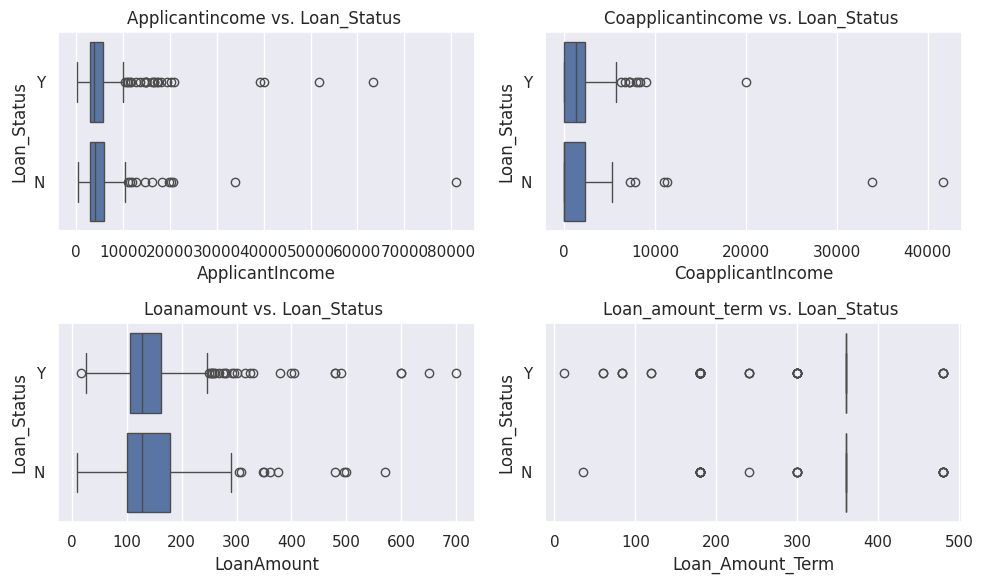

In [ ]:
# Mashiat_B190305046
plot_continuous_features = Plotter(X_train, y_train)
for i, col in enumerate(continuous_features):
    plot_continuous_features.Plot_Box(i // 2, i % 2, x=col)

plot_continuous_features.Show_Plots()

Create an grouped dataframe for Analysis categorical features

In [ ]:
# Mashiat_B190305046
result_df = pd.DataFrame(columns=['Features', 'Category', 'Count'])

for col in categorical_features:
    # Get the value counts for the column
    value_counts = loan_dataset[col].value_counts().reset_index()
    value_counts.columns = ['Category', 'Count']
    value_counts['Features'] = col
    result_df = pd.concat([result_df, value_counts], ignore_index=True)

# Display the result
grouped_df = result_df.groupby('Features').agg({'Category': list, 'Count': list})
grouped_df

,Category,Count
Features,,
Credit_History,"[1.0, 0.0]","[475, 89]"
Dependents,"[0, 1, 2, 3+]","[345, 102, 101, 51]"
Education,"[Graduate, Not Graduate]","[480, 134]"
Gender,"[Male, Female]","[489, 112]"
Married,"[Yes, No]","[398, 213]"
Property_Area,"[Semiurban, Urban, Rural]","[233, 202, 179]"
Self_Employed,"[No, Yes]","[500, 82]"


Missing Value Analysis

In [ ]:
# Mashiat_B190305046
def calculate_missing_values(X_train, X_val, X_test):
    Miss_Train = X_train.isna().sum()
    Miss_Val = X_val.isna().sum()
    Miss_test = X_test.isna().sum()

    # Convert the series to dataframes
    output_train = pd.DataFrame(Miss_Train, columns=['Missing Values X_train'])
    output_val = pd.DataFrame(Miss_Val, columns=['Missing Values X_val'])
    output_test = pd.DataFrame(Miss_test, columns=['Missing Values X_test'])


    # Concatenate the dataframes output_train and output_val
    output = pd.concat([output_train, output_val,output_test], axis=1, join='inner')

    return output

output = calculate_missing_values(X_train, X_val, X_test)

In [ ]:
# Mashiat_B190305046
def color_cell(value):
    if value >= 20:
        return 'background-color:#9b59b6'  # dark purple
    elif value >= 10 and value < 20:
        return 'background-color:#c39bd3'  # medium
    elif value >= 1 and value < 10:
        return 'background-color:#d7bde2 '  #  light
    return ''

styled_df = output.style.applymap(color_cell)

styled_df

,Missing Values X_train,Missing Values X_val,Missing Values X_test
Gender,6,4,3
Married,2,0,1
Dependents,11,2,2
Education,0,0,0
Self_Employed,29,2,1
ApplicantIncome,0,0,0
CoapplicantIncome,0,0,0
LoanAmount,21,1,0
Loan_Amount_Term,12,0,2
Credit_History,42,4,4


Finding Rows with 50% or More Null Values in each sets

In [ ]:
# Mashiat_B190305046
def find_rows_with_high_null_values(df):
    threshold = 0.5
    # Getting DataFrame Name
    df_name = [name for name in globals() if globals()[name] is df][0]
    null_threshold = int(threshold * len(df.columns))
    null_rows = df[df.apply(lambda x: x.isnull().sum(), axis=1) >= null_threshold]
    num_null_rows = len(null_rows)
    print(f"The number of rows consisting of more than 50% missing values in {df_name} is: {num_null_rows}")

# Example usage:
find_rows_with_high_null_values(X_train)
find_rows_with_high_null_values(X_val)
find_rows_with_high_null_values(X_test)

The number of rows consisting of more than 50% missing values in X_train is: 0
The number of rows consisting of more than 50% missing values in X_val is: 0
The number of rows consisting of more than 50% missing values in X_test is: 0


calculate mean columns

In [ ]:
# Mashiat_B190305046
def calculate_mean(df, column):
    mean = df[column].mean().round()
    return mean

for col in ["LoanAmount","Loan_Amount_Term"]:
    print(f'Mean {col} in Trainset is: {calculate_mean(X_train, col)}')
    print(f'Mean {col} in Valset is: {calculate_mean(X_val, col)}')
    print(f'Mean {col} in Testset is: {calculate_mean(X_test, col)}')

Mean LoanAmount in Trainset is: 148.0
Mean LoanAmount in Valset is: 140.0
Mean LoanAmount in Testset is: 140.0
Mean Loan_Amount_Term in Trainset is: 341.0
Mean Loan_Amount_Term in Valset is: 346.0
Mean Loan_Amount_Term in Testset is: 346.0


In [ ]:
# Mashiat_B190305046
def fill_missing_values_by_mean(df, column):
    for col in cols:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

cols = ["LoanAmount","Loan_Amount_Term"]
X_train = fill_missing_values_by_mean(X_train, cols)
X_val = fill_missing_values_by_mean(X_val, cols)
X_test = fill_missing_values_by_mean(X_test, cols)

In [ ]:
# Mashiat_B190305046
Isna_cate = ['Gender', 'Married','Education', 'Dependents', 'Self_Employed', 'Property_Area', 'Credit_History']

Most frequent value for each categorical feature

In [ ]:
# Mashiat_B190305046
def Get_Mode(df, cols):
    list_of_most_frequent = {}
    for col in cols:
        f = df[col].mode().iloc[0]
        list_of_most_frequent[col] = f
    return pd.DataFrame(list_of_most_frequent, index=['Most Frequent'])

Most frequent value for each categorical feature in X_train

In [ ]:
# Mashiat_B190305046
Get_Mode(X_train, Isna_cate)

,Gender,Married,Education,Dependents,Self_Employed,Property_Area,Credit_History
Most Frequent,Male,Yes,Graduate,0,No,Semiurban,1.0


Most frequent value for each categorical feature in X_Val

In [ ]:
# Mashiat_B190305046
Get_Mode(X_val, Isna_cate)

,Gender,Married,Education,Dependents,Self_Employed,Property_Area,Credit_History
Most Frequent,Male,Yes,Graduate,0,No,Semiurban,1.0


Most frequent value for each categorical feature in X_test

In [ ]:
# Mashiat_B190305046
Get_Mode(X_test, Isna_cate)

,Gender,Married,Education,Dependents,Self_Employed,Property_Area,Credit_History
Most Frequent,Male,Yes,Graduate,0,No,Semiurban,1.0


Handling Missing Values in Categorical Features

In [ ]:
# Mashiat_B190305046
def Fill_Null(df,cols):

    for col in cols:
        df[col].fillna(df[col].mode()[0], inplace=True)

    return df

X_train = Fill_Null(X_train, Isna_cate)
X_val = Fill_Null(X_val, Isna_cate)
X_test = Fill_Null(X_test, Isna_cate)

Changing the data type of Credit_History to int using astype()

In [ ]:
# Mashiat_B190305046
for df in [X_train, X_val, X_test]:
    df['Credit_History'] = df['Credit_History'].astype(int)

In [ ]:
# Mashiat_B190305046
X_train.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [ ]:
# Mashiat_B190305046
X_val.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [ ]:
# Mashiat_B190305046
X_test.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [ ]:
# Mashiat_B190305046
Nominal_fetaures = ['Gender', 'Married','Education', 'Self_Employed', 'Property_Area']

Encoding Categorical Features

In [ ]:
# Mashiat_B190305046
def encode_categorical_features(df, cols):

    for col in cols:
        dummies = pd.get_dummies(df[col], dtype=int, prefix=col)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(labels=col, axis=1)
    return df

# Encode the categorical features in the training and test sets
X_train = encode_categorical_features(X_train, Nominal_fetaures)
X_val = encode_categorical_features(X_val, Nominal_fetaures )
X_test = encode_categorical_features(X_test, Nominal_fetaures )

In [ ]:
# Mashiat_B190305046
encoder = {'0': 1/4, '1': 2/4, '2': 3/4, '3+': 4/4}
for df in [X_train, X_val, X_test]:
    df["Dependents"] = df['Dependents'].map(encoder)

In [ ]:
# Mashiat_B190305046
X_train.head(5)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
101,0.25,4843,3806.0,151.0,360.0,1,0,1,1,0,1,0,1,0,0,1,0
116,0.25,3167,2283.0,154.0,360.0,1,1,0,0,1,1,0,1,0,0,1,0
191,0.25,12000,0.0,164.0,360.0,1,0,1,1,0,1,0,1,0,0,1,0
237,0.25,3463,0.0,122.0,360.0,1,1,0,1,0,1,0,0,1,0,0,1
222,0.25,2971,2791.0,144.0,360.0,1,0,1,1,0,1,0,1,0,0,1,0


Convet target column to int

In [ ]:
# Mashiat_B190305046
mapping = {'Y': 1,'N': 0}
y_train = pd.Series(y_train).map(mapping)
y_val = pd.Series(y_val).map(mapping)
y_test = pd.Series(y_test).map(mapping)

Using SMOTE Technique  to Balancing TrainSet

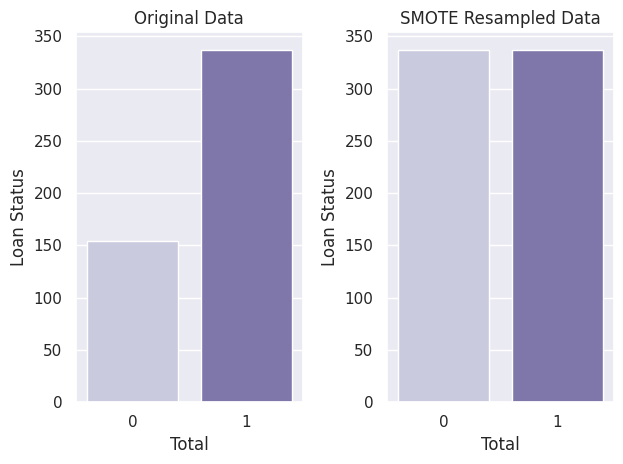

In [ ]:
# Mashiat_B190305046
plt.subplot(1, 2, 1)
sns.countplot(x=y_train, data=X_train, palette='Purples')
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.title('Original Data')

X_train, y_train = SMOTE().fit_resample(X_train, y_train)
plt.subplot(1, 2, 2)
sns.countplot(x=y_train, data=X_train, palette='Purples')
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.title('SMOTE Resampled Data')

plt.tight_layout()
plt.show()

Correlation Analysis

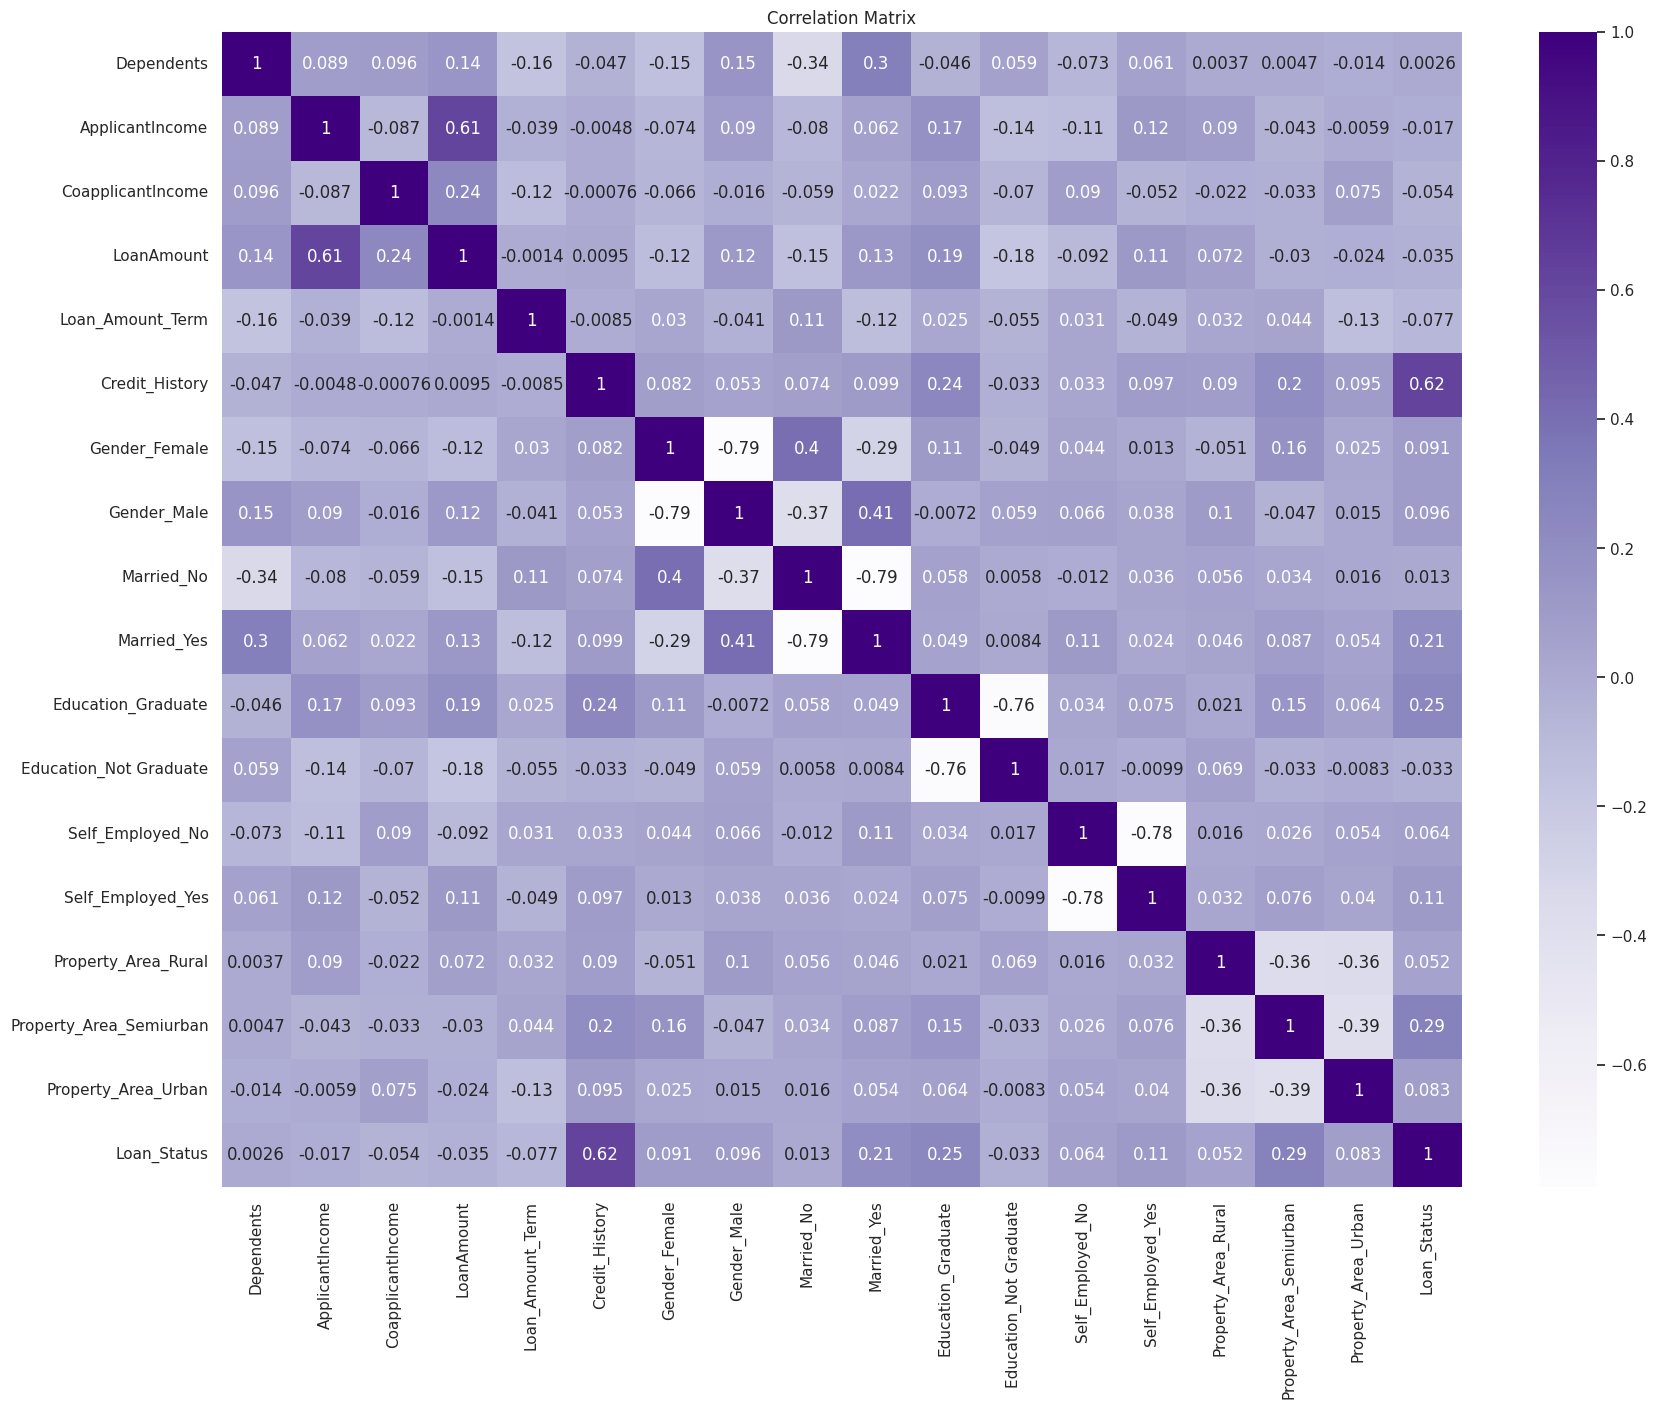

In [ ]:
# Mashiat_B190305046
train_copy = pd.concat([X_train, y_train], axis=1)
corr_matrix =train_copy.corr()
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap='Purples', annot=True, ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

Mutual Information

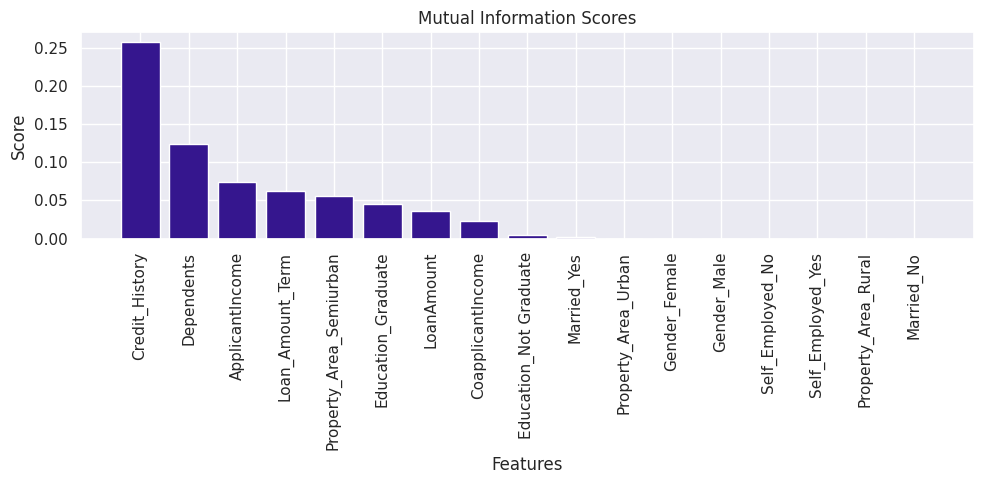

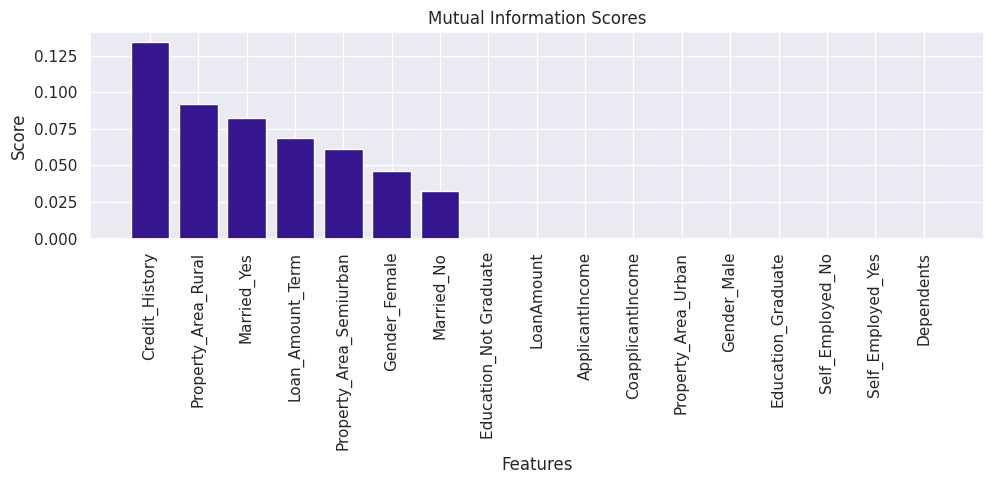

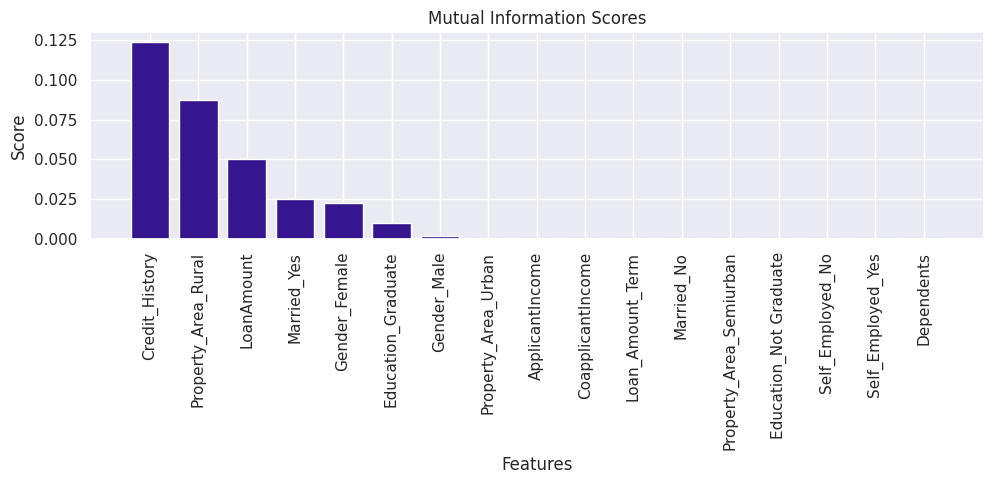

In [ ]:
# Mashiat_B190305046
for X, y in zip([X_train, X_val, X_test], [y_train, y_val, y_test]):
    feature_names = X.columns
    scores = mutual_info_classif(X, y)

    # Create an array of indices for sorting the scores and feature names
    indices = np.argsort(scores)[::-1]

    # Sort the scores and feature names based on the indices
    sorted_scores = scores[indices]
    sorted_feature_names = [feature_names[i] for i in indices]

    plt.figure(figsize=(10,5))
    plt.bar(range(len(sorted_scores)), sorted_scores,color='#35168e')
    plt.xticks(range(len(sorted_scores)), sorted_feature_names, rotation='vertical')
    plt.title("Mutual Information Scores")
    plt.xlabel("Features")
    plt.ylabel("Score")
    plt.tight_layout()
    plt.show()


Dropping Features with 0.0 scores in mutual information (MI)

In [ ]:
# Mashiat_B190305046
drop_fetaures = ['Dependents', 'CoapplicantIncome','Loan_Amount_Term',
                 'Gender_Female', 'Married_Yes','Education_Graduate',
                 'Self_Employed_No', 'Self_Employed_Yes','Property_Area_Urban']

def Dropping(df, cols):

    for col in cols:
        df = df.drop(labels=col, axis=1)
    return df

X_train = Dropping(X_train, drop_fetaures)
X_val = Dropping(X_val, drop_fetaures )
X_test = Dropping(X_test, drop_fetaures )

Scalling the dataset using StandardScaler

In [ ]:
# Mashiat_B190305046
scaler = StandardScaler()

X_V = X_val.values
X_T = X_test.values
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_val = scaler.transform(X_V)
scaled_x_test = scaler.transform(X_T)

Dimensionality Reduction with PCA

In [ ]:
# Mashiat_B190305046
pca = PCA(n_components = 7)
train_reduced = pca.fit_transform(scaled_x_train)
val_reduced = pca.transform(scaled_x_val)
test_reduced = pca.transform(scaled_x_test)

Import Dataset

In [ ]:
# Mashiat_B190305046
loan_dataset= pd.read_csv("/content/train_u6lujuX_CVtuZ9i (1).csv")

Drop Unecessary Variables

In [ ]:
# Mashiat_B190305046
loan_dataset = loan_dataset.drop("Loan_ID", axis=1)

In [ ]:
# Mashiat_B190305046
# Splitting Data into Train, Validation, and Test Sets
X = loan_dataset.drop(columns='Loan_Status')
Y = loan_dataset['Loan_Status']

# Splitting into Train and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2,stratify=Y, shuffle=True, random_state = 40)

# Splitting Validation Set into Validation and Test Sets
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, stratify=y_val, shuffle=True, random_state = 40)

In [ ]:
# Mashiat_B190305046
class Preprocessor:
    def __init__(self, X_train, X_val, X_test, categorical_features, continuous_features):
        self.X_train = X_train
        self.X_val = X_val
        self.X_test = X_test
        self.categorical_features = categorical_features
        self.continuous_features = continuous_features
        self.scaler = StandardScaler()
        self.pca = PCA(n_components=7)

    def handle_missing_values_cont(self):
        for col in self.continuous_features:
            self.X_train[col].fillna(self.X_train[col].mean(), inplace=True)
            self.X_val[col].fillna(self.X_val[col].mean(), inplace=True)
            self.X_test[col].fillna(self.X_test[col].mean(), inplace=True)
        print("Missing values in continuous columns handled.")
        return self.X_train, self.X_val ,self.X_test

    # Mashiat_B190305046
    def handle_missing_values_cate(self):
        for col in self.categorical_features:
            self.X_train[col].fillna(self.X_train[col].mode()[0], inplace=True)
            self.X_val[col].fillna(self.X_val[col].mode()[0], inplace=True)
            self.X_test[col].fillna(self.X_test[col].mode()[0], inplace=True)
        print("Missing values in categorical columns handled.")
        return self.X_train, self.X_val ,self.X_test

    def encode_categorical_features(self):
        for col in self.categorical_features:
            if col == 'Dependents':
                encoder = {'0': 1/4, '1': 2/4, '2': 3/4, '3+': 4/4}
                self.X_train[col] = self.X_train[col].map(encoder)
                self.X_val[col] = self.X_val[col].map(encoder)
                self.X_test[col] = self.X_test[col].map(encoder)
            else:
                train_dummies = pd.get_dummies(self.X_train[col], dtype=int, prefix=col)
                val_dummies = pd.get_dummies(self.X_val[col], dtype=int, prefix=col)
                test_dummies = pd.get_dummies(self.X_test[col], dtype=int, prefix=col)
                self.X_train = pd.concat([self.X_train, train_dummies], axis=1).drop(labels=col, axis=1)
                self.X_val = pd.concat([self.X_val, val_dummies], axis=1).drop(labels=col, axis=1)
                self.X_test = pd.concat([self.X_test, test_dummies], axis=1).drop(labels=col, axis=1)
        print("Categorical features encoded.")

        return self.X_train, self.X_val ,self.X_test

    # Mashiat_B190305046
    def Scaling(self):
        self.V = self.X_val.values
        self.T = self.X_test.values
        self.X_train = self.scaler.fit_transform(self.X_train)
        self.X_val = self.scaler.transform(self.V)
        self.X_test = self.scaler.transform(self.T)
        print("All DataSets Scaled!")
        return self.X_train, self.X_val ,self.X_test

    def DR(self):
        self.X_train = self.pca.fit_transform(self.X_train)
        self.X_val = self.pca.transform(self.X_val)
        self.X_test = self.pca.transform(self.X_test)
        print("Dimensionality reduction (PCA) applied on All DataSet")
        return self.X_train, self.X_val ,self.X_test

In [ ]:
# Mashiat_B190305046
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
continuous_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

preprocessor = Preprocessor(X_train,X_val,X_test ,categorical_features, continuous_features)


no_miss_X_train, no_miss_X_val ,no_miss_X_test = preprocessor.handle_missing_values_cont()
no_miss_X_train, no_miss_X_val ,no_miss_X_test = preprocessor.handle_missing_values_cate()
preprocessed_X_train, preprocessed_X_val ,preprocessed_X_test = preprocessor.encode_categorical_features()
scaled_X_train, scaled_X_val ,scaled_X_test = preprocessor.Scaling()
reduced_X_train, reduced_X_val ,reduced_X_test = preprocessor.DR()

Missing values in continuous columns handled.
Missing values in categorical columns handled.
Categorical features encoded.
All DataSets Scaled!
Dimensionality reduction (PCA) applied on All DataSet


In [ ]:
# Mashiat_B190305046
preprocessed_X_train.to_csv('TrainSet.csv', index=False)
preprocessed_X_val.to_csv('ValidationSet.csv', index=False)
preprocessed_X_test.to_csv('TestSet.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv("/content/Loan_Default.csv.zip")
df1.head(4)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [ ]:
import missingno as msno

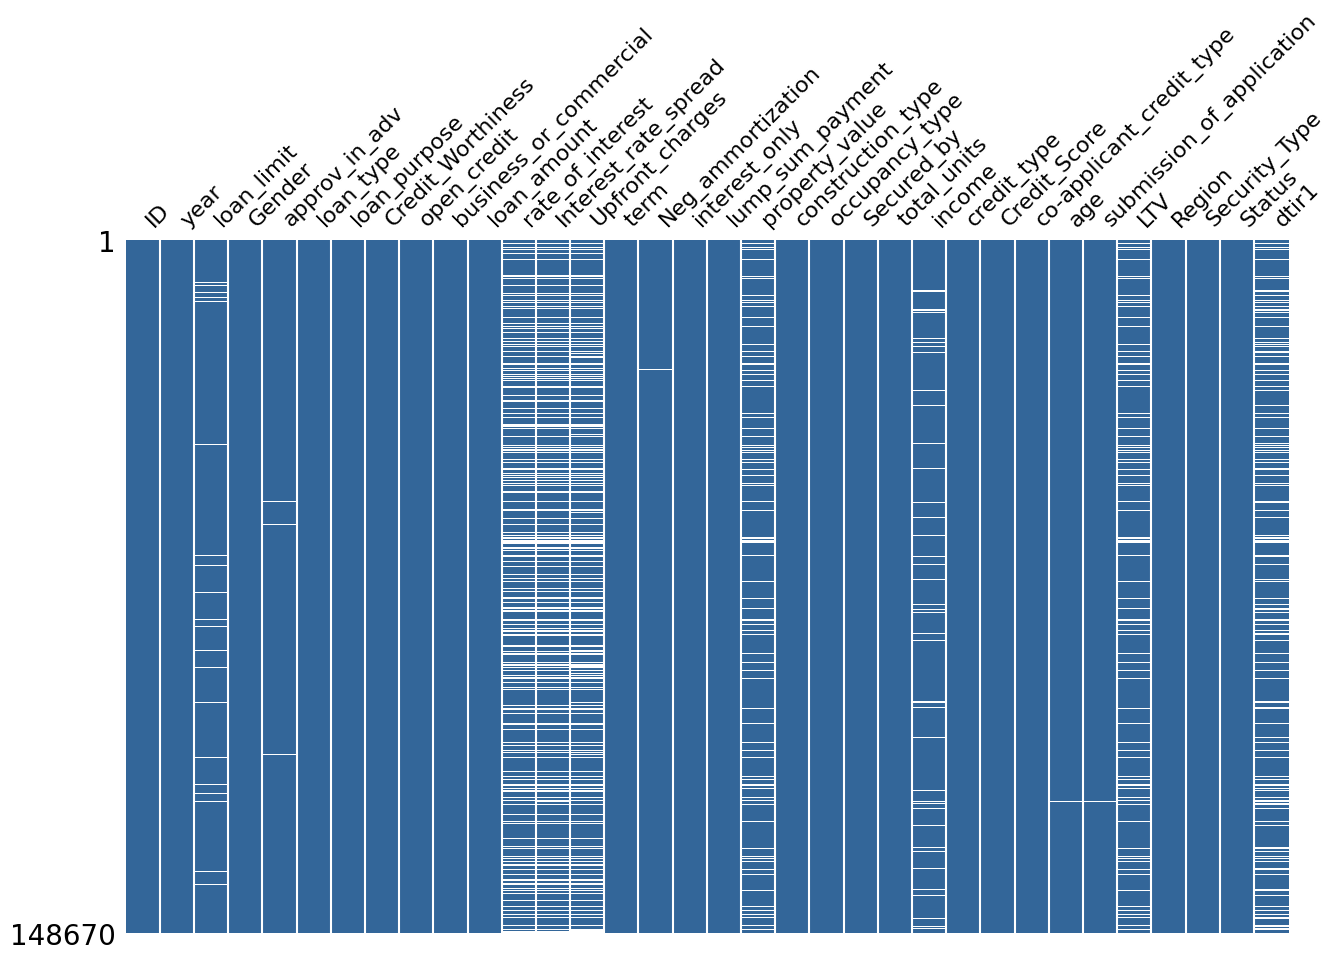

In [ ]:
# Mashiat_B190305046
msno.matrix(df1, figsize=(15, 9), color=(0.2, 0.4, 0.6), sparkline=False)
plt.show()

<Axes: >

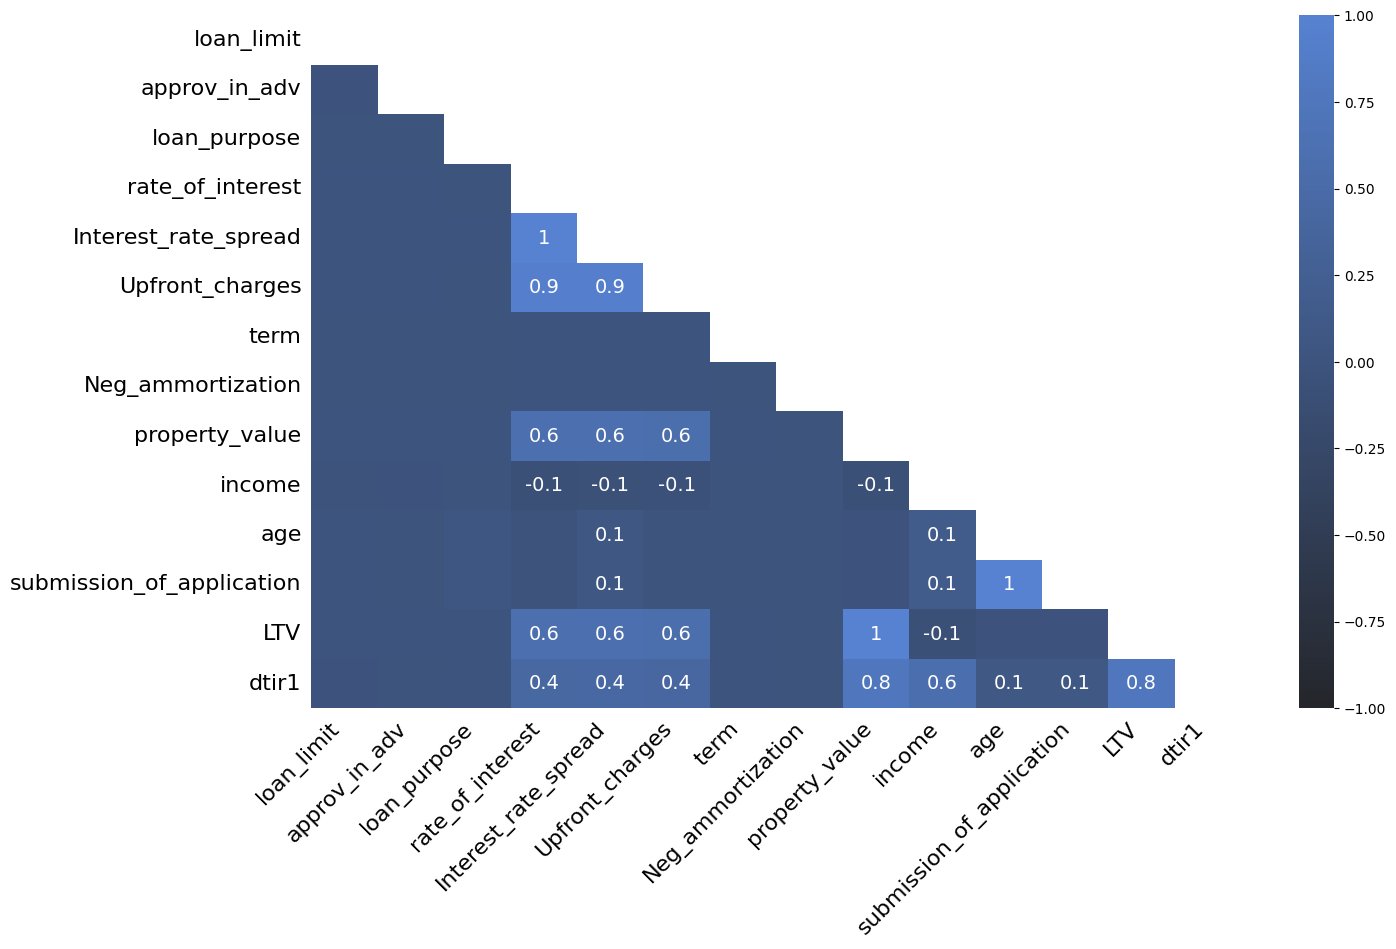

In [ ]:
# Mashiat_B190305046
import seaborn as sns
cmap = sns.dark_palette("#5682d1", as_cmap=True)
msno.heatmap(df1, labels = True,cmap=cmap, figsize=(15, 9))

In [ ]:
# Mashiat_B190305046
missing_columns = [col for col in df1.columns if df1[col].isnull().sum() > 0]
missing_columns

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'Neg_ammortization',
 'property_value',
 'income',
 'age',
 'submission_of_application',
 'LTV',
 'dtir1']

<Axes: >

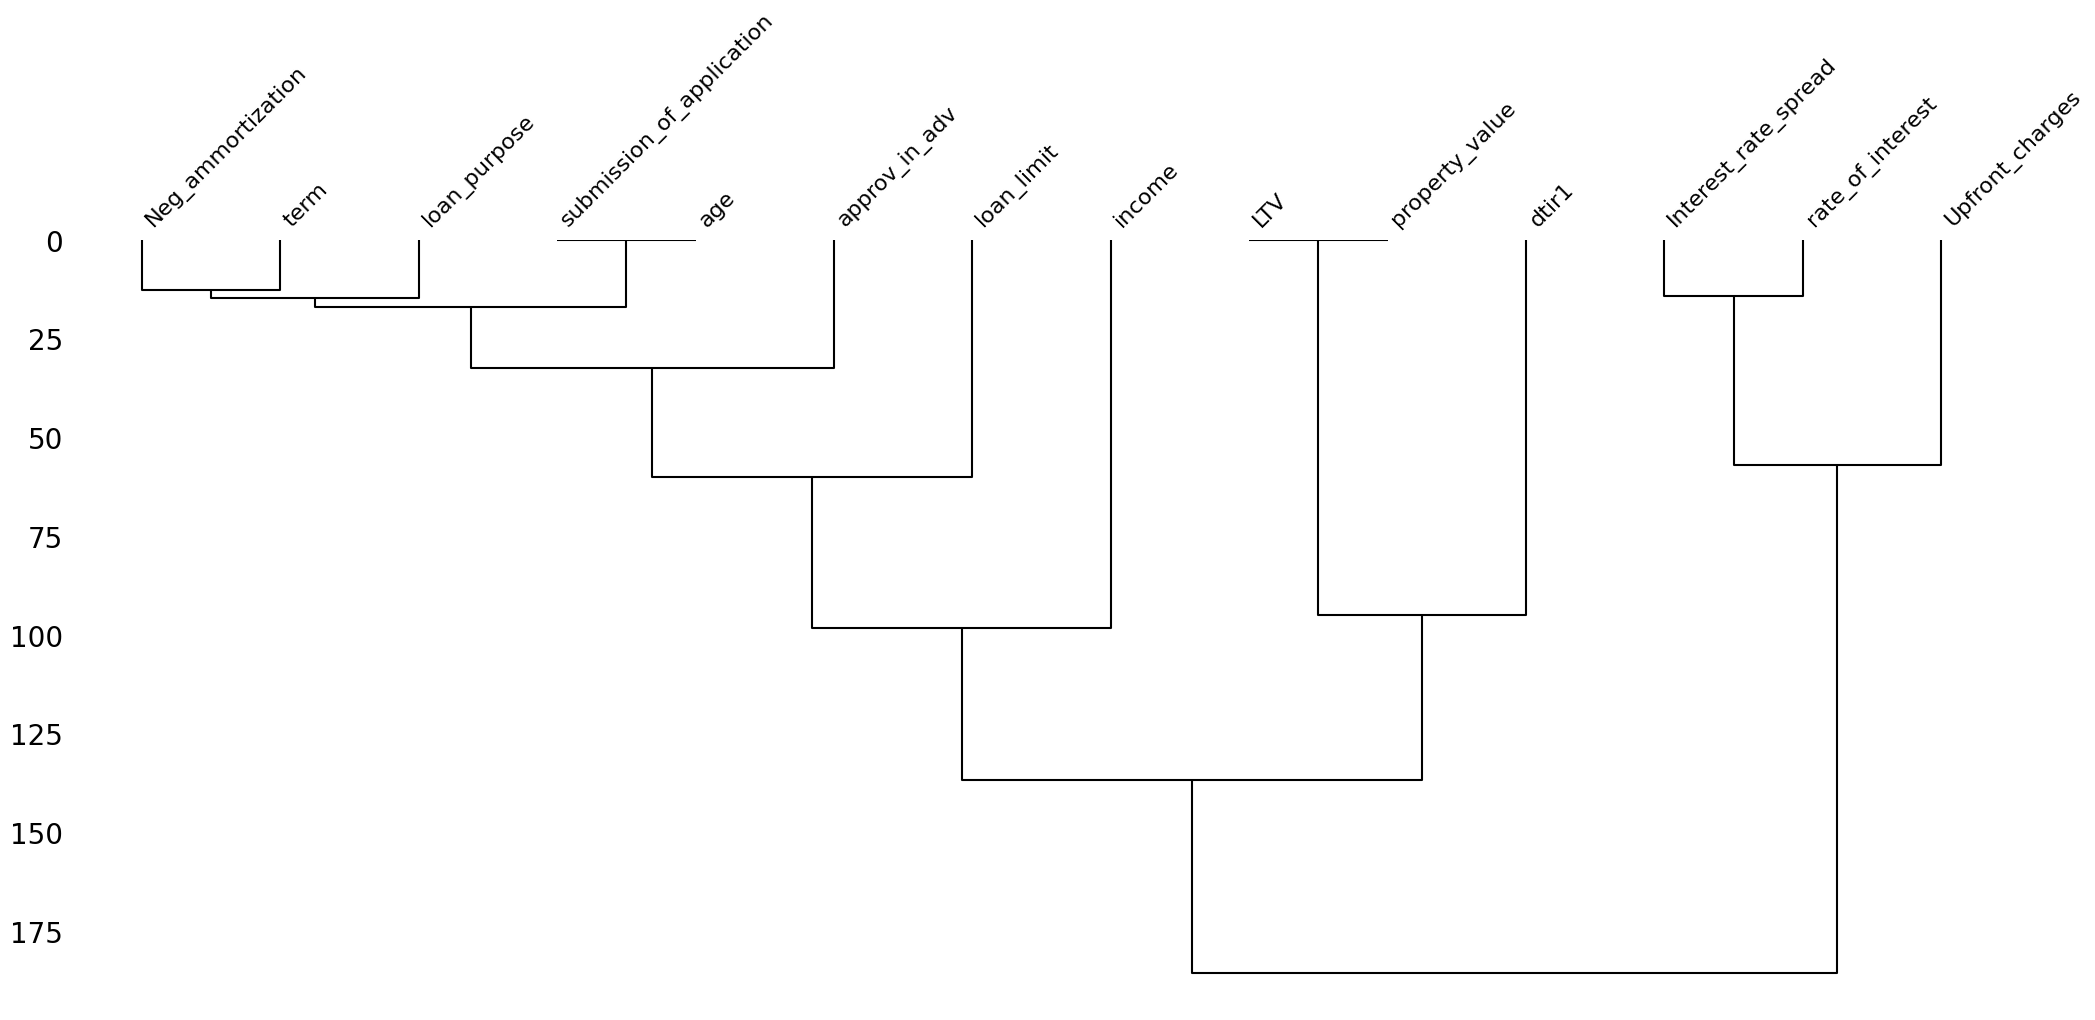

In [ ]:
msno.dendrogram(df1[missing_columns])

In [ ]:
def get_numerical_summary(df1):
    total = df1.shape[0]
    missing_columns = [col for col in df1.columns if df1[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = df1[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent

In [ ]:
missing_percent = get_numerical_summary(df1)

loan_limit : 3344 (2.249%)
approv_in_adv : 908 (0.611%)
loan_purpose : 134 (0.09%)
rate_of_interest : 36439 (24.51%)
Interest_rate_spread : 36639 (24.645%)
Upfront_charges : 39642 (26.664%)
term : 41 (0.028%)
Neg_ammortization : 121 (0.081%)
property_value : 15098 (10.155%)
income : 9150 (6.155%)
age : 200 (0.135%)
submission_of_application : 200 (0.135%)
LTV : 15098 (10.155%)
dtir1 : 24121 (16.225%)


In [ ]:
from sklearn.impute import KNNImputer
df_temp = df1.copy()

In [ ]:
num_cols = [col for col in df_temp.columns if df_temp[col].dtype != 'object']
print(num_cols)
df_temp = df_temp[num_cols]

['ID', 'year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1']


In [ ]:
# Mashiat_B190305046
knn = KNNImputer(n_neighbors = 3)
knn.fit(df_temp)

KNNImputer(n_neighbors=3)

In [ ]:
X = knn.transform(df_temp)
df_temp = pd.DataFrame(X, columns = num_cols)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [ ]:
missing_columns

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'Neg_ammortization',
 'property_value',
 'income',
 'age',
 'submission_of_application',
 'LTV',
 'dtir1']

In [ ]:
# Mashiat_B190305046
from sklearn.tree import DecisionTreeRegressor
dr = DecisionTreeRegressor()

In [ ]:
income = df1['income']

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
cat_cols = [col for col in df1.columns if df1[col].dtype == 'object']
for col in cat_cols:
    if col not in df_temp.columns:
        df_temp[col] = df1[col]
    df_temp[col] = lb.fit_transform(df_temp[col])

In [ ]:
# Mashiat_B190305046
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor


def tree_imputation(df1):
    missing_cols = [col for col in df1.columns if df1[col].isnull().sum() > 0]
    non_missing_cols = [col for col in df1.columns if df1[col].isnull().sum() == 0]
    for col in missing_cols:
        # Defining a new bagging model for each attribute
        model = BaggingRegressor(DecisionTreeRegressor(), n_estimators = 40, max_samples = 1.0, max_features = 1.0, bootstrap = False, n_jobs = -1)

        col_missing = df1[df1[col].isnull()]
        temp = df1.drop(df1[df1[col].isnull()].index, axis = 0)

        # print(temp.columns)
        X = temp.loc[:, non_missing_cols]
        y = temp[col]

        model.fit(X, y)
        y_pred = model.predict(col_missing[non_missing_cols])

        df1.loc[col_missing.index, col] = y_pred

    return df1


In [ ]:
df_new = tree_imputation(df_temp)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  float64
 1   year                       148670 non-null  float64
 2   loan_amount                148670 non-null  float64
 3   rate_of_interest           148670 non-null  float64
 4   Interest_rate_spread       148670 non-null  float64
 5   Upfront_charges            148670 non-null  float64
 6   term                       148670 non-null  float64
 7   property_value             148670 non-null  float64
 8   income                     148670 non-null  float64
 9   Credit_Score               148670 non-null  float64
 10  LTV                        148670 non-null  float64
 11  Status                     148670 non-null  float64
 12  dtir1                      148670 non-null  float64
 13  loan_limit                 14

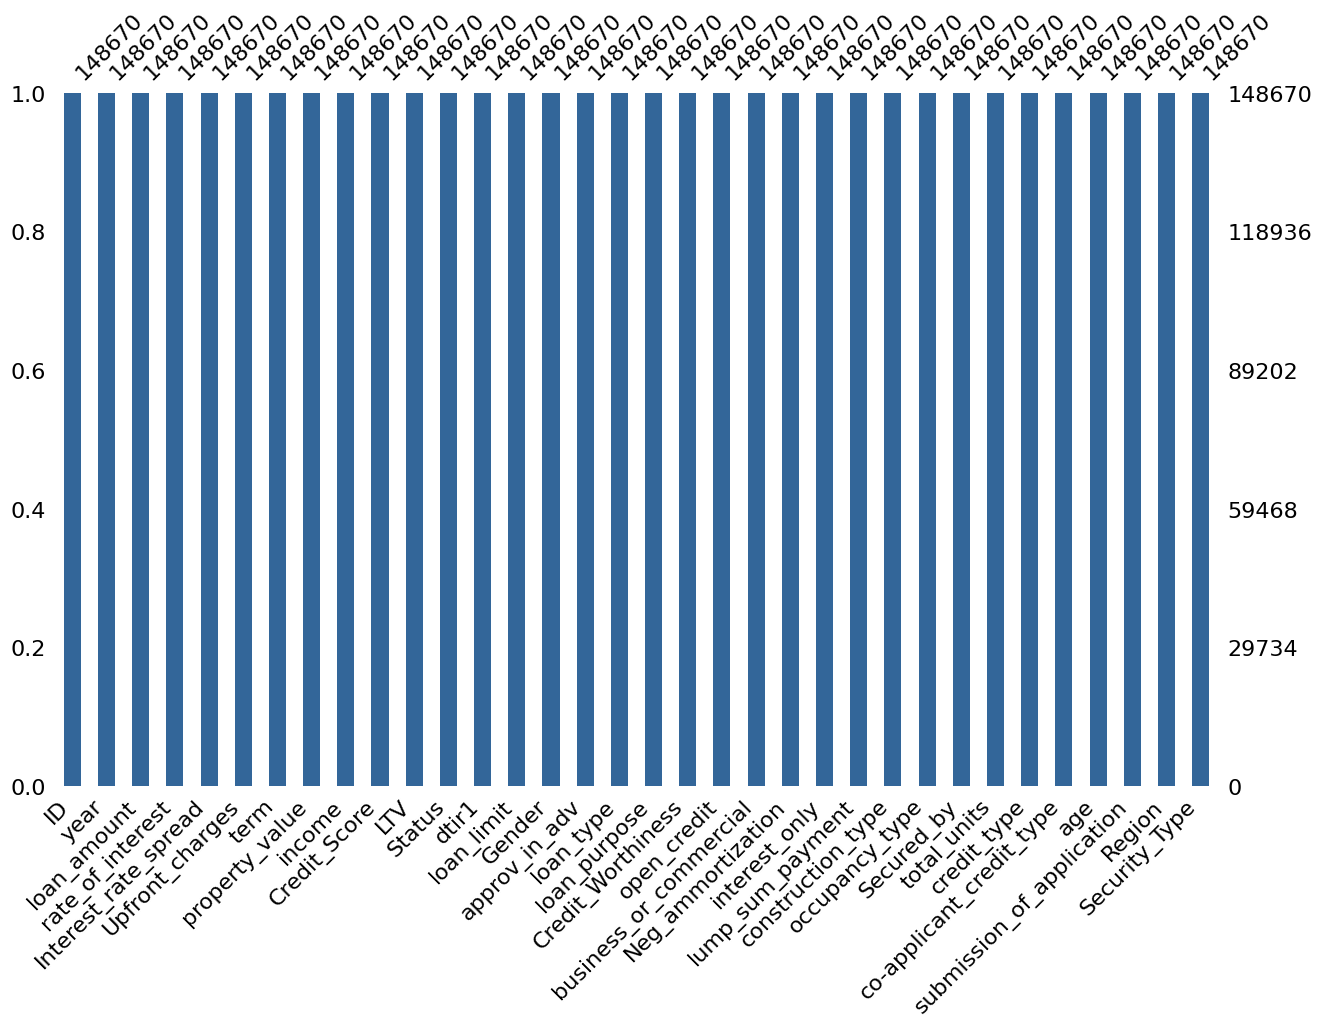

In [ ]:
# Mashiat_B190305046
msno.bar(df_new, figsize=(15, 9), color=(0.2, 0.4, 0.6))
plt.show()

In [ ]:
# Mashiat_B190305046
df_new = pd.concat([df1[cat_cols], df_new.drop(cat_cols, axis = 1)], axis = 1)
df_new.head(4)

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,not_neg,not_int,...,4.201667,0.972767,3405.226667,360.0,118000.000000,1740.0,758.0,98.728814,1.0,45.000000
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,not_neg,not_int,...,3.996667,0.677800,558.893333,360.0,281333.333333,4980.0,552.0,77.321504,1.0,36.333333
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,neg_amm,not_int,...,4.560000,0.200000,595.000000,360.0,508000.000000,9480.0,834.0,80.019685,0.0,46.000000
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,...,4.250000,0.681000,124.500000,360.0,658000.000000,11880.0,587.0,69.376900,0.0,42.000000


In [ ]:
df_temp = df_new.copy()

In [ ]:
# Mashiat_B190305046
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
cat_cols = [col for col in df_temp.columns if df_temp[col].dtype == 'object']
for col in cat_cols:
    df_temp[col] = lb.fit_transform(df_temp[col])

In [ ]:
# Mashiat_B190305046
def likelihood_encoding(df, cat_cols, target_variable = "Status"):

    df_temp = df1.copy()
    for col in cat_cols:
        effect = {}
        print(col)
        for category in df1[col].unique():
            print(category)

            try:
                temp = df1[df1[col] == category]
                lr = LogisticRegression()
                X = temp.drop(target_variable, axis = 1, inplace = False)
                y = temp[target_variable]
                lr.fit(X, y)

                effect[category] = accuracy_score(y, lr.predict(X))
            except Exception as E:
                print(E)

        for key, value in effect.items():
            effect[key] = np.log(effect[key] / (1 - effect[key] + 1e-6))

        df_temp.loc[:, col] = df_temp.loc[:, col].map(effect)
    return df_temp

In [ ]:
df_temp = likelihood_encoding(df_temp, cat_cols)
df_temp.head(4)

loan_limit
cf
could not convert string to float: 'cf'
nan
Found array with 0 sample(s) (shape=(0, 33)) while a minimum of 1 is required by LogisticRegression.
ncf
could not convert string to float: 'ncf'
Gender
Sex Not Available
could not convert string to float: 'cf'
Male
could not convert string to float: 'cf'
Joint
could not convert string to float: 'cf'
Female
could not convert string to float: 'cf'
approv_in_adv
nopre
could not convert string to float: 'cf'
pre
could not convert string to float: 'cf'
nan
Found array with 0 sample(s) (shape=(0, 33)) while a minimum of 1 is required by LogisticRegression.
loan_type
type1
could not convert string to float: 'cf'
type2
could not convert string to float: 'cf'
type3
could not convert string to float: 'cf'
loan_purpose
p1
could not convert string to float: 'cf'
p4
could not convert string to float: 'cf'
p3
could not convert string to float: 'cf'
p2
could not convert string to float: 'ncf'
nan
Found array with 0 sample(s) (shape=(0, 33)) w

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,758,NaN,NaN,NaN,98.728814,NaN,NaN,1,45.0
1,24891,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,552,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2,24892,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,834,NaN,NaN,NaN,80.019685,NaN,NaN,0,46.0
3,24893,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,587,NaN,NaN,NaN,69.376900,NaN,NaN,0,42.0


In [ ]:
del df_temp

In [ ]:
# Mashiat_B190305046
def target_encoding(df, cat_cols, target_variable = "Status"):

    for col in cat_cols:
        weight = 7
        feat = df1.groupby(col)[target_variable].agg(["mean", "count"])
        mean = feat['mean']
        count = feat['count']

        smooth = (count * mean + weight * mean) / (weight + count)

        df1.loc[:, col] = df1.loc[:, col].map(smooth)

    return df1

In [ ]:
df_temp = df_new.copy()

In [ ]:
# Mashiat_B190305046
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

cat_cols = [col for col in df_temp.columns if df_temp[col].dtype == 'object']

for col in cat_cols:
    df_temp[col] = lb.fit_transform(df_temp[col])

In [ ]:
df_temp = target_encoding(df_temp, cat_cols)
df_temp.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [ ]:
# Mashiat_B190305046
df1['age'].value_counts()

,count
age,
45-54,34720
35-44,32818
55-64,32534
65-74,20744
25-34,19142
>74,7175
<25,1337


In [ ]:
# Mashiat_B190305046
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

import matplotlib
matplotlib.rc('figure', figsize = (20, 8))
matplotlib.rc('font', size = 14)
matplotlib.rc('axes.spines', top = False, right = False)
matplotlib.rc('axes', grid = False)
matplotlib.rc('axes', facecolor = 'white')

In [ ]:
# Mashiat_B190305046
import json
mc_df = pd.read_json('/content/modcloth_final_data.json', lines=True)
mc_df.head(4)

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN


In [ ]:
mc_df.columns

Index(['item_id', 'waist', 'size', 'quality', 'cup size', 'hips', 'bra size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe size', 'shoe width', 'review_summary', 'review_text'],
      dtype='object')

In [ ]:
mc_df.columns = ['item_id', 'waist', 'size', 'quality', 'cup_size', 'hips', 'bra_size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe_size', 'shoe_width', 'review_summary', 'review_text']

In [ ]:
mc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup_size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra_size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe_size       27915 non-null  float64
 15  shoe_width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_text     76065 non-null 

In [ ]:
# Mashiat_B190305046
missing_data = pd.DataFrame({'total_missing': mc_df.isnull().sum(),
                             'perc_missing': (mc_df.isnull().sum()/82790)*100})
missing_data

,total_missing,perc_missing
item_id,0,0.000000
waist,79908,96.518903
size,0,0.000000
quality,68,0.082136
cup_size,6255,7.555260
hips,26726,32.281677
bra_size,6018,7.268994
category,0,0.000000
bust,70936,85.681846
height,1107,1.337118


In [ ]:
# Mashiat_B190305046
mc_df.describe()

,item_id,waist,size,quality,hips,bra_size,user_id,shoe_size
count,82790.000000,2882.000000,82790.000000,82722.000000,56064.000000,76772.000000,82790.000000,27915.000000
mean,469325.229170,31.319223,12.661602,3.949058,40.358501,35.972125,498849.564718,8.145818
std,213999.803314,5.302849,8.271952,0.992783,5.827166,3.224907,286356.969459,1.336109
min,123373.000000,20.000000,0.000000,1.000000,30.000000,28.000000,6.000000,5.000000
25%,314980.000000,28.000000,8.000000,3.000000,36.000000,34.000000,252897.750000,7.000000
50%,454030.000000,30.000000,12.000000,4.000000,39.000000,36.000000,497913.500000,8.000000
75%,658440.000000,34.000000,15.000000,5.000000,43.000000,38.000000,744745.250000,9.000000
max,807722.000000,50.000000,38.000000,5.000000,60.000000,48.000000,999972.000000,38.000000


Boxplot of numerical variables

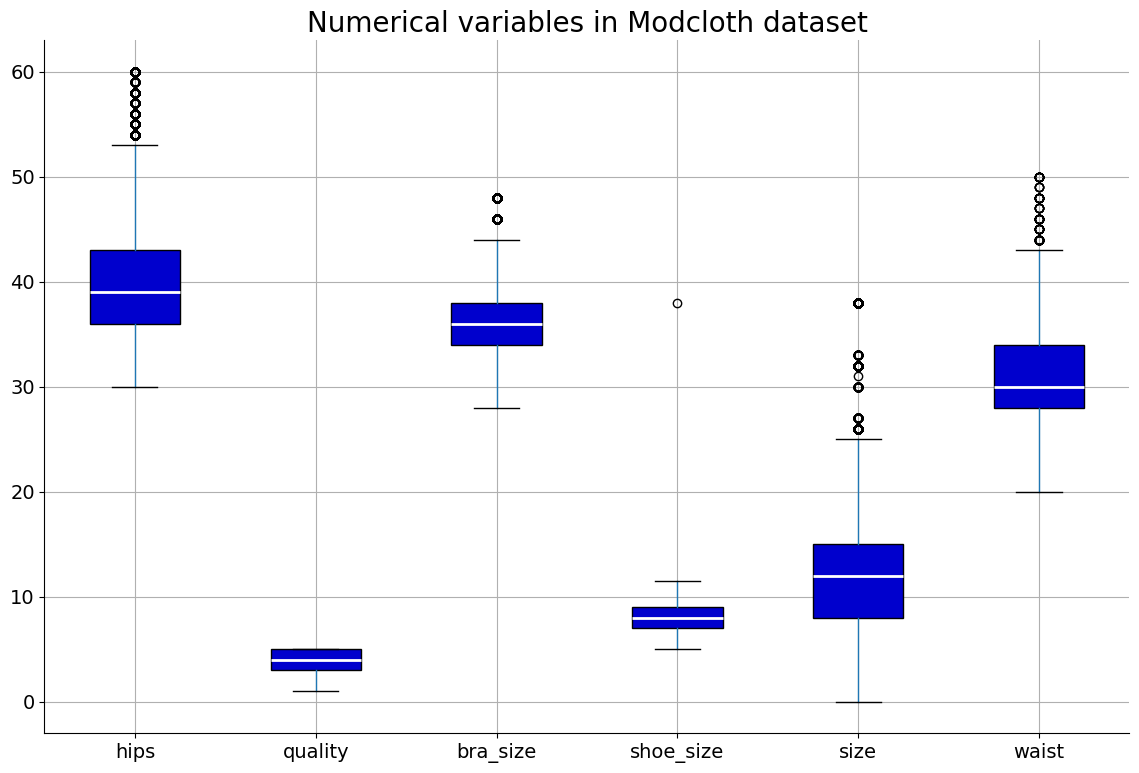

In [ ]:
# Mashiat_B190305046
num_cols = ['hips','quality','bra_size','shoe_size','size','waist']
plt.figure(figsize=(14,9))
mc_df[num_cols].boxplot(patch_artist=True,
                         boxprops=dict(facecolor="mediumblue", color="black"),
                         medianprops=dict(linewidth=2, color='white'))
plt.title("Numerical variables in Modcloth dataset", fontsize=20)
plt.show()

Handling Outliers

In [ ]:
# Mashiat_B190305046
mc_df[mc_df.shoe_size == 38]

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
37313,416942,35.0,12,5.0,d,46.0,36.0,new,37-39,5ft 5in,Catslittle,just right,fit,237498,38.0,average,Cardigans are best item Mod Cloth has,"I love these cardigans, my favorite, good fabr..."


In [ ]:
mc_df.at[37313,'shoe_size'] = None

In [ ]:
# Mashiat_B190305046
mc_df.sort_values(by=['bra_size'], ascending=False).head(3)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
73118,753429,NaN,38,3.0,dd/e,NaN,48.0,bottoms,NaN,5ft 4in,Mikki,slightly long,large,93792,NaN,NaN,I probably should have or,"I probably should have ordered a size down, bu..."
80713,796383,NaN,12,4.0,k,60.0,48.0,outerwear,NaN,7ft 11in,bandnerd2522,just right,small,810539,11.5,average,"This jacket is lovely, bu","This jacket is lovely, but I couldn't move my ..."
28901,401773,NaN,38,4.0,dd/e,58.0,48.0,new,NaN,5ft 7in,barretts4jesus,just right,fit,59963,NaN,NaN,Wonderful cardigan. I hav,Wonderful cardigan. I have the honey one as we...


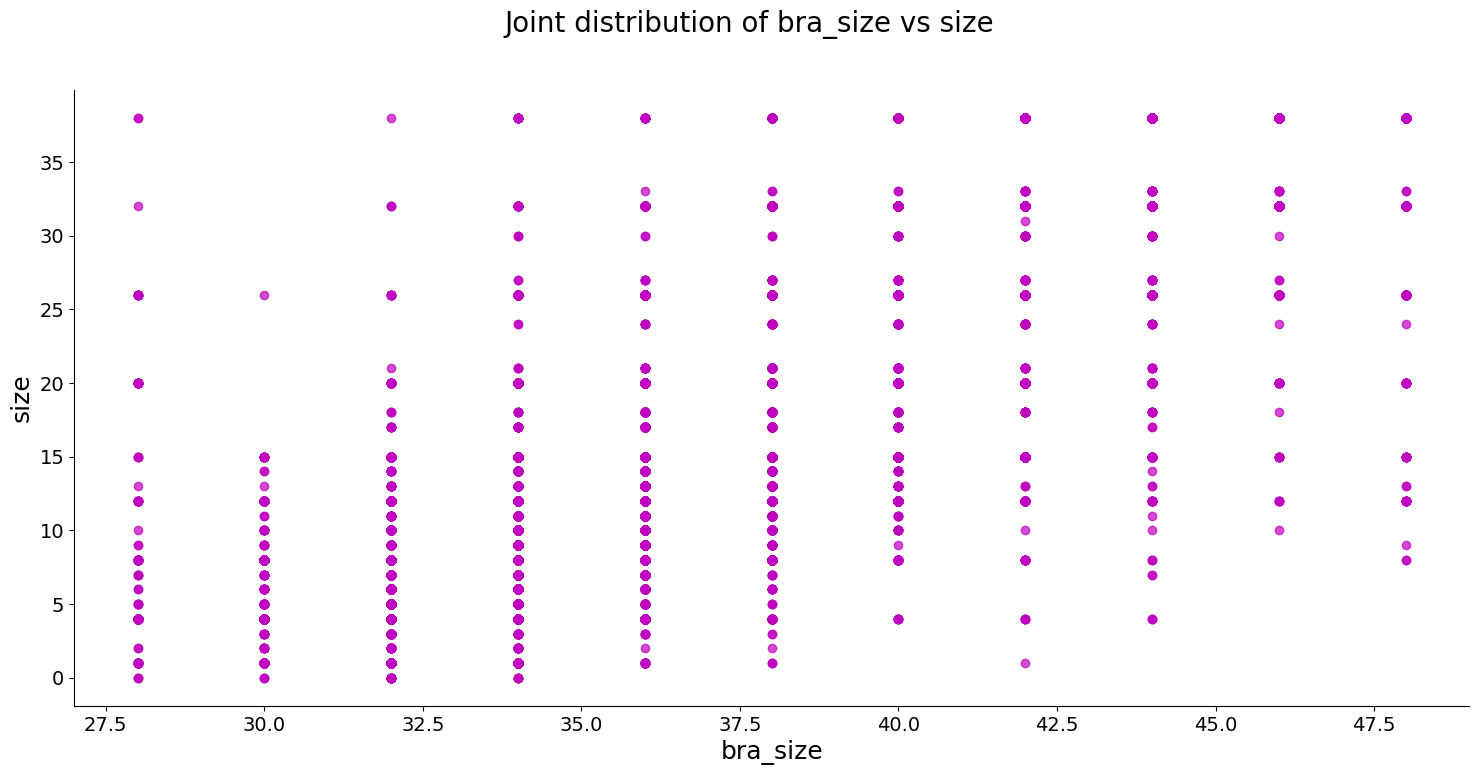

In [ ]:
# Mashiat_B190305046
plt.figure(figsize=(18,8))
plt.xlabel("bra_size", fontsize=18)
plt.ylabel("size", fontsize=18)
plt.suptitle("Joint distribution of bra_size vs size", fontsize= 20)
plt.plot(mc_df.bra_size, mc_df['size'], 'mo', alpha=0.7)
plt.show()

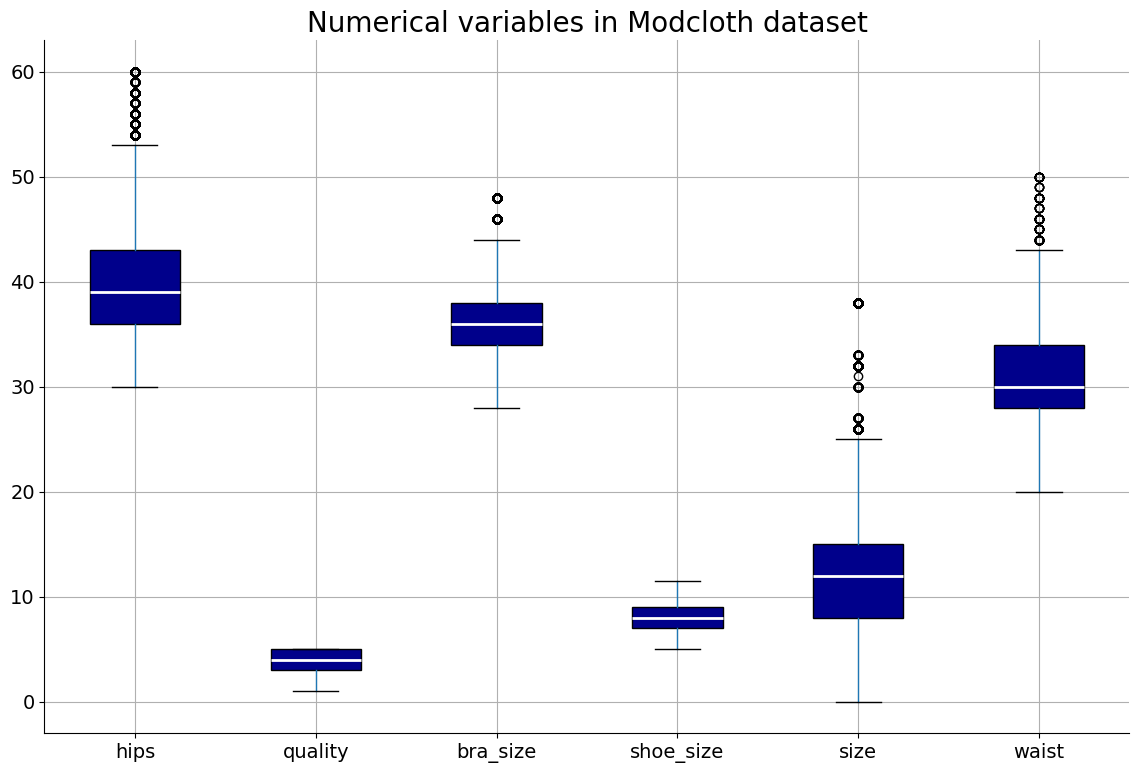

In [ ]:
# Mashiat_B190305046
num_cols = ['hips','quality','bra_size','shoe_size','size','waist']
plt.figure(figsize=(14,9))
mc_df[num_cols].boxplot(patch_artist=True,
                         boxprops=dict(facecolor="darkblue", color="black"),
                         medianprops=dict(linewidth=2, color='white'))
plt.title("Numerical variables in Modcloth dataset", fontsize=20)
plt.show()

Initial Distribution of features

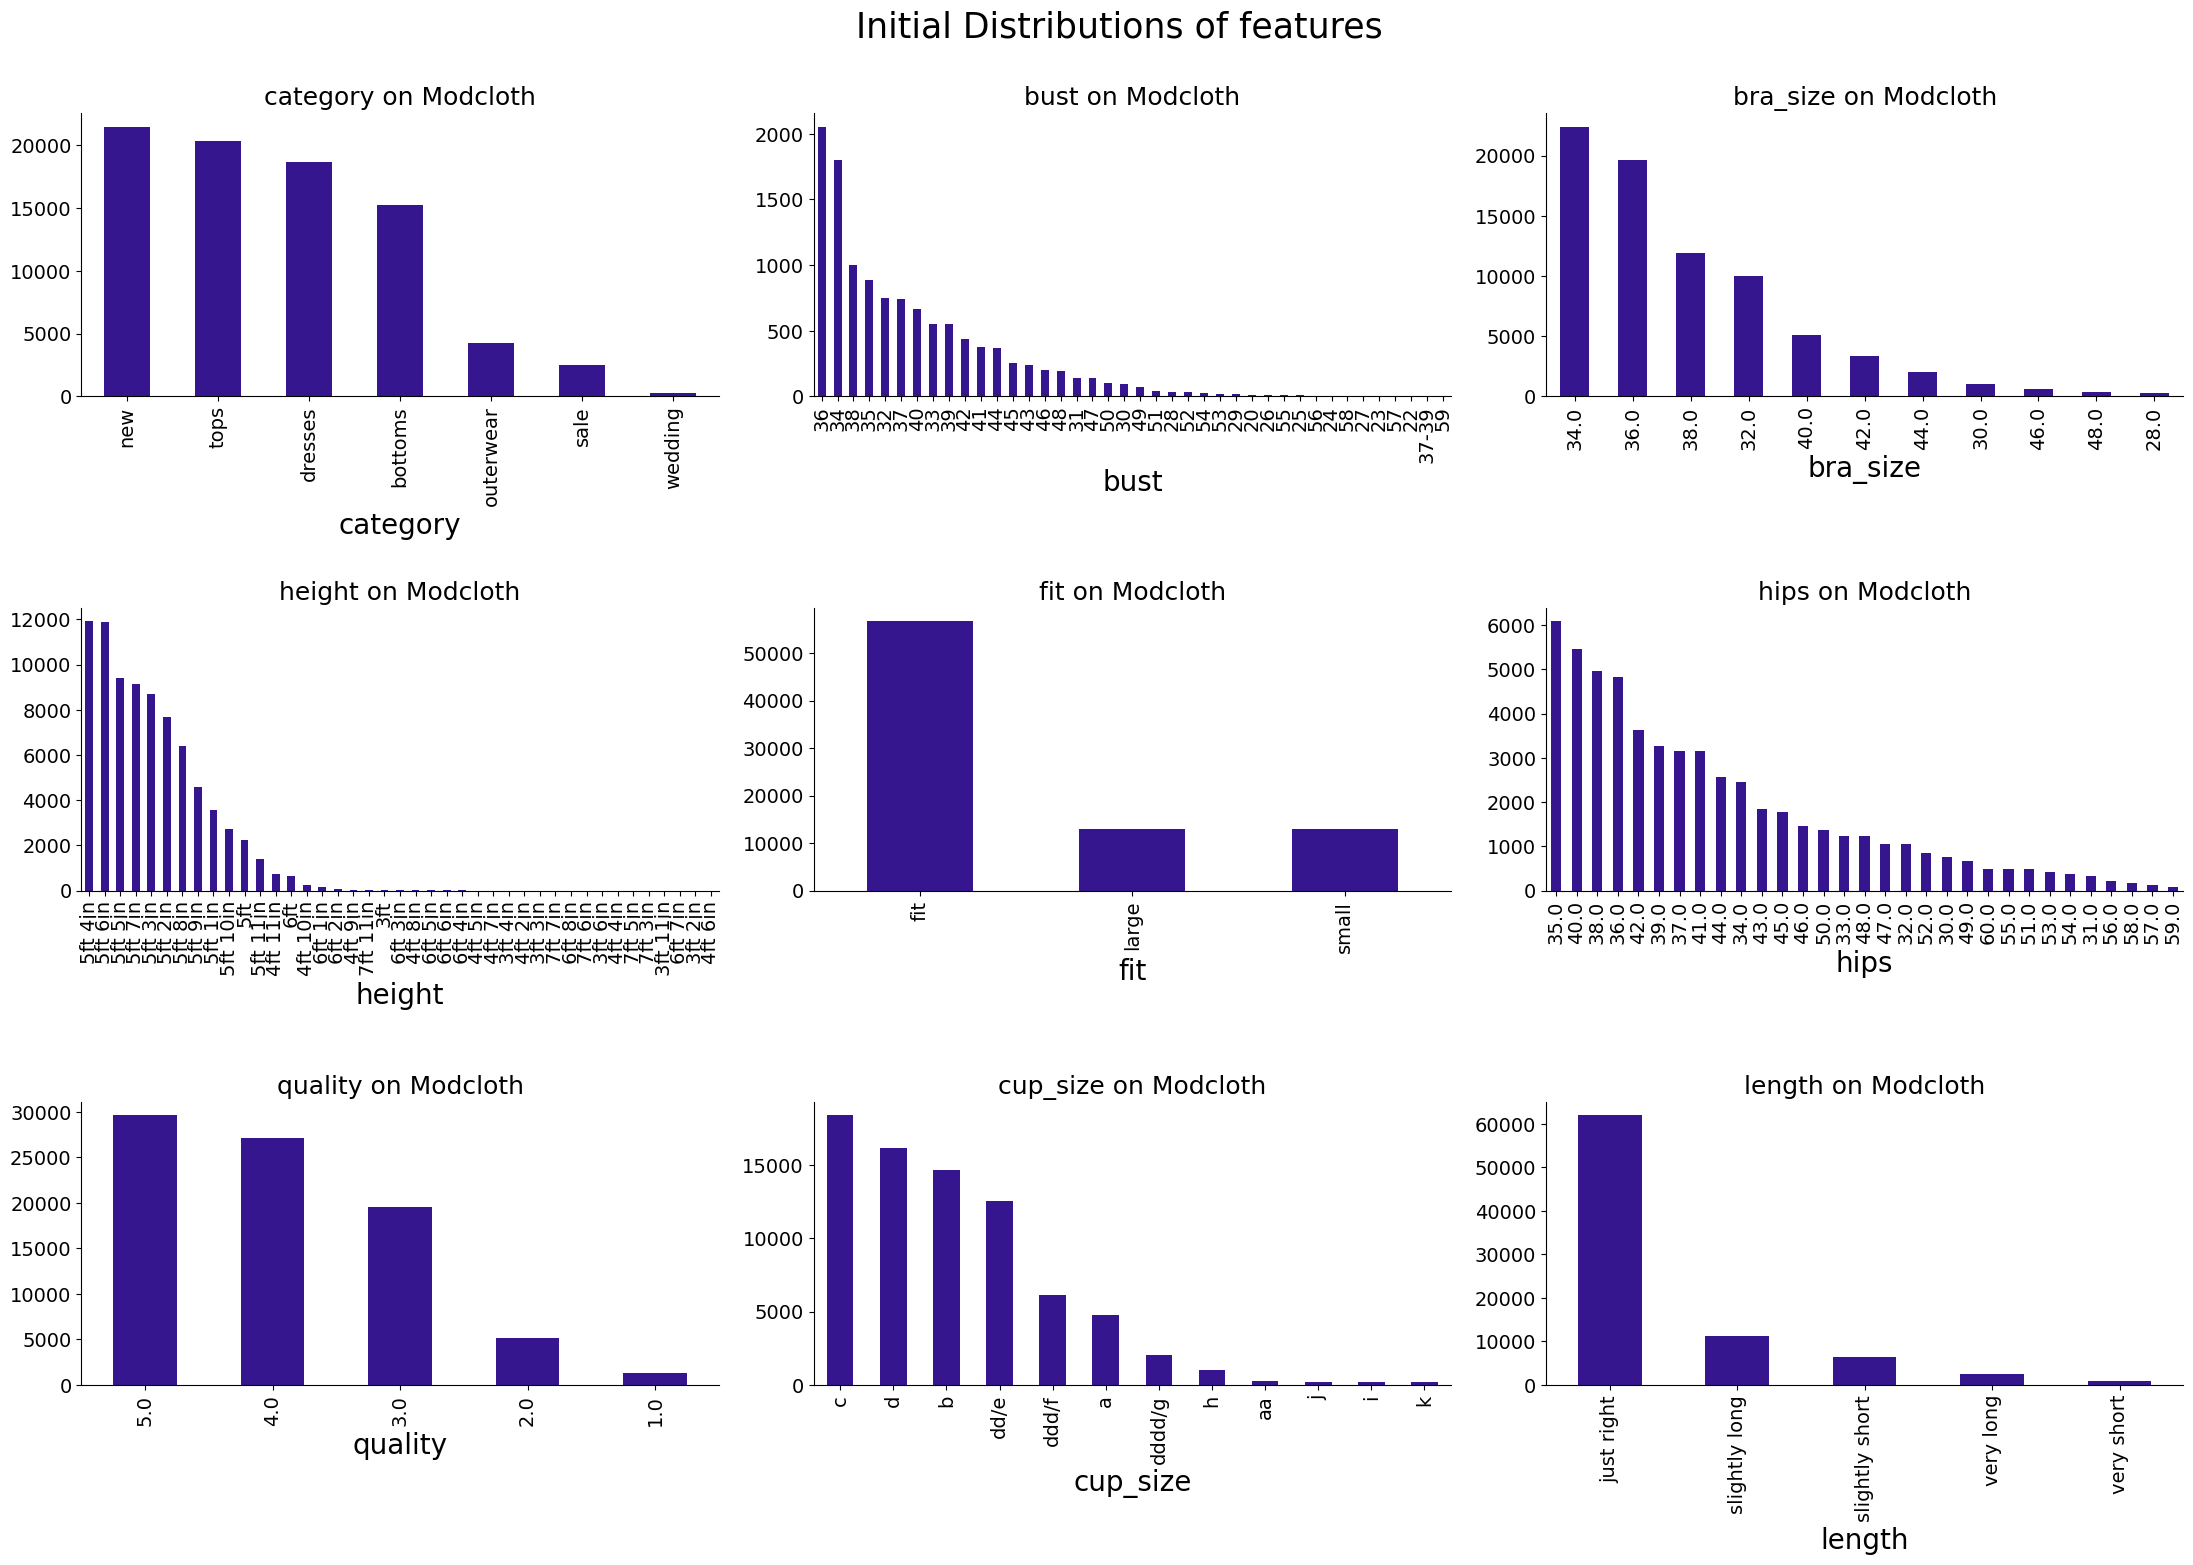

In [ ]:
# Mashiat_B190305046
def plot_dist(col, ax):
    mc_df[col][mc_df[col].notnull()].value_counts().plot(kind='bar',
                                              facecolor='#35168e', ax=ax)
    ax.set_xlabel('{}'.format(col), fontsize=20)
    ax.set_title("{} on Modcloth".format(col), fontsize= 18)
    return ax

f, ax = plt.subplots(3,3, figsize = (22,15))
f.tight_layout(h_pad=9, w_pad=2, rect=[0, 0.03, 1, 0.93])
cols = [ 'category','bust','bra_size','height' , 'fit','hips' ,
        'quality','cup_size', 'length' ]
k = 0
for i in range(3):
    for j in range(3):
        plot_dist(cols[k], ax[i][j])
        k += 1
__ = plt.suptitle("Initial Distributions of features", fontsize= 25)

In [ ]:
# Mashiat_B190305046
mc_df.bra_size = mc_df.bra_size.fillna('Unknown')
mc_df.bra_size = mc_df.bra_size.astype('category').cat.as_ordered()
mc_df.at[37313,'bust'] = '38'
mc_df.bust = mc_df.bust.fillna(0).astype(int)
mc_df.category = mc_df.category.astype('category')

In [ ]:
mc_df[mc_df.cup_size.isnull()].sample(2)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
50636,539980,NaN,26,5.0,NaN,48.0,Unknown,tops,0,5ft 5in,kbryan858,just right,fit,64813,NaN,NaN,Love it!,Love it!
53466,604607,NaN,4,5.0,NaN,NaN,Unknown,tops,0,5ft 2in,Pei Lin,just right,fit,735001,NaN,NaN,This cardigan is such a u,This cardigan is such a unique colour! Its gre...


In [ ]:
# Mashiat_B190305046
mc_df.cup_size.fillna('Unknown', inplace=True)
mc_df.cup_size = mc_df.cup_size.astype('category').cat.as_ordered()

mc_df.fit = mc_df.fit.astype('category')

In [ ]:
# Mashiat_B190305046
def get_cms(x):
    if type(x) == type(1.0):
        return
    #print(x)
    try:
        return (int(x[0])*30.48) + (int(x[4:-2])*2.54)
    except:
        return (int(x[0])*30.48)
mc_df.height = mc_df.height.apply(get_cms)

In [ ]:
# Mashiat_B190305046
mc_df[mc_df.height.isnull()].head(2)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
3,123373,NaN,21,5.0,dd/e,NaN,Unknown,new,0,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
17,123373,NaN,15,4.0,dddd/g,NaN,36.0,new,0,NaN,Megan,just right,large,128353,NaN,NaN,NaN,NaN


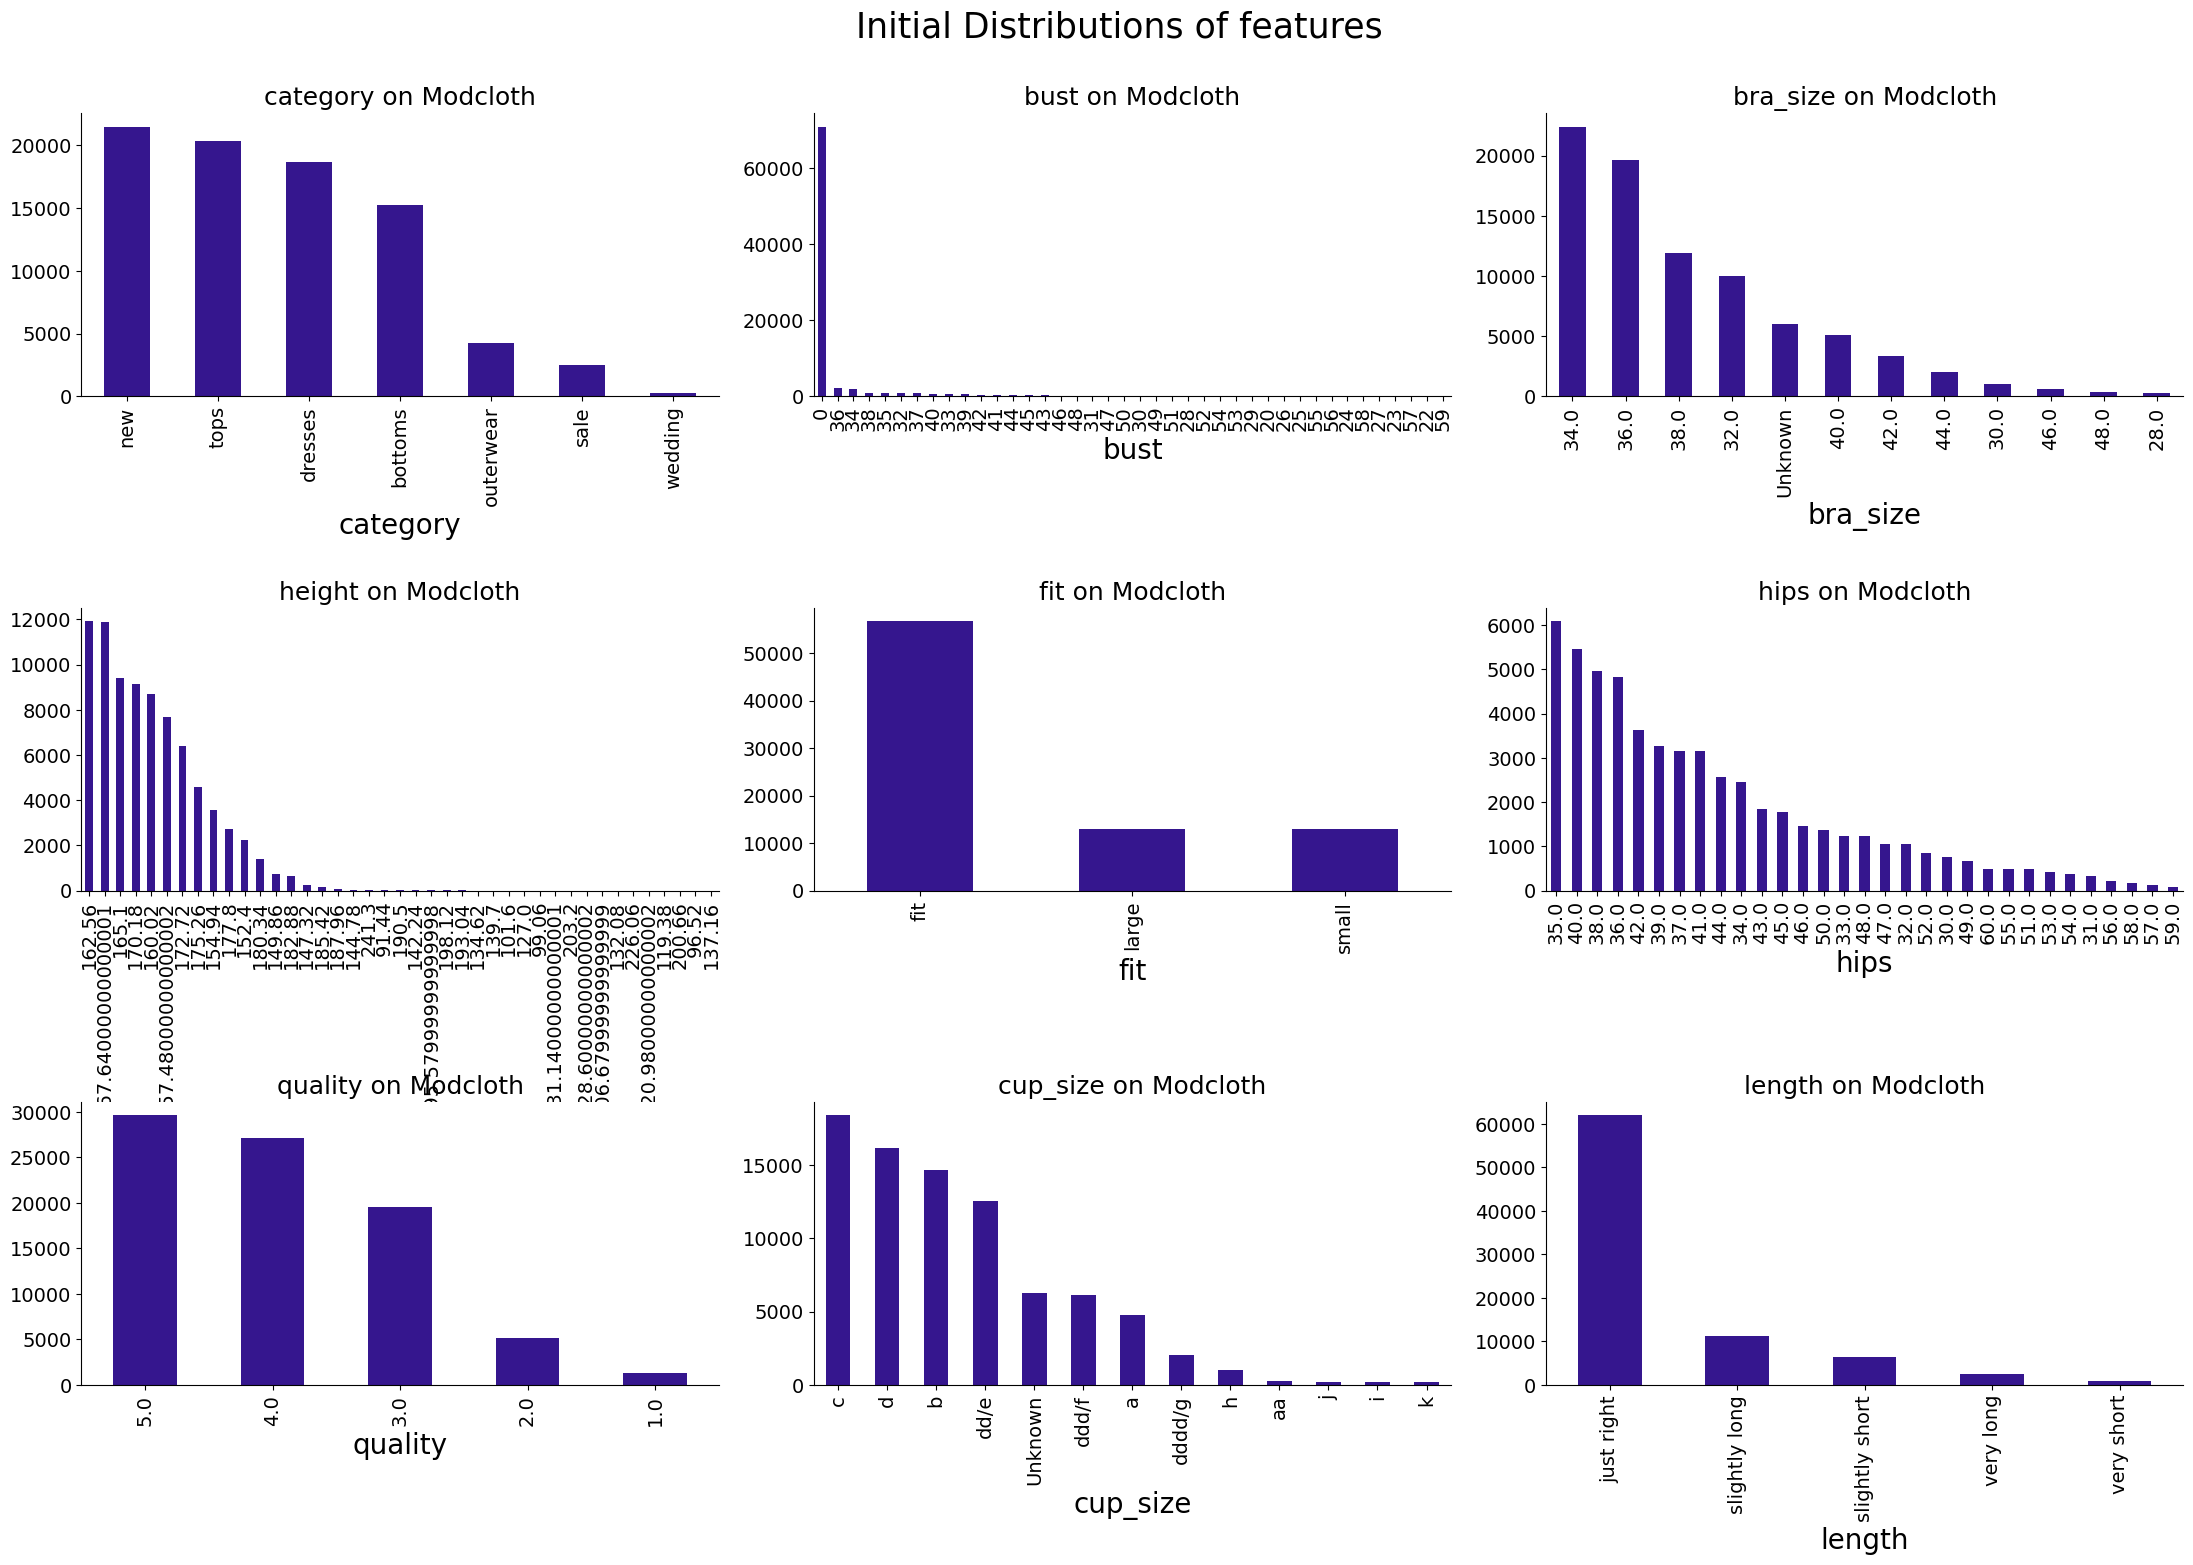

In [ ]:
# Mashiat_B190305046
def plot_dist(col, ax):
    mc_df[col][mc_df[col].notnull()].value_counts().plot(kind='bar', facecolor='#35168e', ax=ax)
    ax.set_xlabel('{}'.format(col), fontsize=20)
    ax.set_title("{} on Modcloth".format(col), fontsize= 18)
    return ax

f, ax = plt.subplots(3,3, figsize = (22,15))
f.tight_layout(h_pad=9, w_pad=2, rect=[0, 0.03, 1, 0.93])
cols = [ 'category','bust','bra_size','height' , 'fit','hips' , 'quality','cup_size', 'length' ]
k = 0
for i in range(3):
    for j in range(3):
        plot_dist(cols[k], ax[i][j])
        k += 1
__ = plt.suptitle("Initial Distributions of features", fontsize= 25)

In [ ]:
# Mashiat_B190305046
mc_df[((mc_df.bra_size != 'Unknown') | (mc_df.cup_size != 'Unknown')) & (mc_df.height.isnull()) & (mc_df.hips.isnull()) &
     (mc_df.shoe_size.isnull()) & (mc_df.shoe_width.isnull()) & (mc_df.waist.isnull())].head(3)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
3,123373,NaN,21,5.0,dd/e,NaN,Unknown,new,0,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
17,123373,NaN,15,4.0,dddd/g,NaN,36.0,new,0,NaN,Megan,just right,large,128353,NaN,NaN,NaN,NaN
43,123373,NaN,15,5.0,dd/e,NaN,36.0,new,0,NaN,sdhewey,just right,fit,670919,NaN,NaN,NaN,NaN


In [ ]:
# Mashiat_B190305046
mc_df[(mc_df.bra_size == 'Unknown') & (mc_df.cup_size == 'Unknown') & (mc_df.height.isnull()) & (mc_df.hips.isnull()) &
     ((mc_df.shoe_size.notnull()) | (mc_df.shoe_width.notnull())) & (mc_df.waist.isnull())].head(3)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
553,125442,NaN,7,5.0,Unknown,NaN,Unknown,new,0,NaN,sharonpeporter,slightly long,fit,461540,7.0,average,NaN,NaN
591,125442,NaN,7,3.0,Unknown,NaN,Unknown,new,0,NaN,julia.burch,slightly short,small,675878,8.5,narrow,NaN,NaN
665,125442,NaN,7,5.0,Unknown,NaN,Unknown,new,0,NaN,Kate,slightly short,fit,131784,9.5,wide,NaN,NaN


In [ ]:
# Mashiat_B190305046
mc_df[(mc_df.bra_size == 'Unknown') & (mc_df.cup_size == 'Unknown') & (mc_df.height.isnull()) & ((mc_df.hips.notnull()) | (mc_df.waist.notnull())) &
     (mc_df.shoe_size.isnull()) & (mc_df.shoe_width.isnull())].head(3)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
2364,131020,NaN,11,5.0,Unknown,39.0,Unknown,new,0,NaN,aislinnalysse,just right,fit,259712,NaN,NaN,NaN,NaN
3568,143287,NaN,12,5.0,Unknown,41.0,Unknown,new,38,NaN,a.stahle,just right,fit,300915,NaN,NaN,NaN,NaN
8714,161514,NaN,26,5.0,Unknown,58.0,Unknown,dresses,0,NaN,foxlindseyfox,just right,fit,817544,NaN,NaN,I wore this dress when I,I wore this dress when I was in a friend's wed...


In [ ]:
# Mashiat_B190305046
shoe_cond = ((mc_df.bra_size == 'Unknown') & (mc_df.cup_size == 'Unknown') & (mc_df.height.isnull()) & (mc_df.hips.isnull()) &
     ((mc_df.shoe_size.notnull()) | (mc_df.shoe_width.notnull())) & (mc_df.waist.isnull()))
lingerie_cond = (((mc_df.bra_size != 'Unknown') | (mc_df.cup_size != 'Unknown')) & (mc_df.height.isnull()) & (mc_df.hips.isnull()) &
     (mc_df.shoe_size.isnull()) & (mc_df.shoe_width.isnull()) & (mc_df.waist.isnull()))
dress_cond = ((mc_df.bra_size == 'Unknown') & (mc_df.cup_size == 'Unknown') & (mc_df.height.isnull()) & ((mc_df.hips.notnull()) | (mc_df.waist.notnull())) &
     (mc_df.shoe_size.isnull()) & (mc_df.shoe_width.isnull()))
mc_df['first_time_user'] = (shoe_cond | lingerie_cond |  dress_cond)
print("Column added!")
print("Total transactions by first time users who bought these: " + str(sum(mc_df.first_time_user)))
print("Total first time users: " + str(len(mc_df[(lingerie_cond | shoe_cond | dress_cond)].user_id.unique())))

Column added!
Total transactions by first time users who bought these: 903
Total first time users: 565


In [ ]:
# Mashiat_B190305046
mc_df.hips = mc_df.hips.fillna(-1.0)
bins = [-5,0,31,37,40,44,75]
labels = ['Unknown','XS','S','M', 'L','XL']
mc_df.hips = pd.cut(mc_df.hips, bins, labels=labels)

# Handling length column
missing_rows = mc_df[mc_df.length.isnull()].index
mc_df.drop(missing_rows, axis = 0, inplace=True)

# Handling quality
missing_rows = mc_df[mc_df.quality.isnull()].index
mc_df.drop(missing_rows, axis = 0, inplace=True)
mc_df.quality = mc_df.quality.astype('category').cat.as_ordered()

In [ ]:
# Mashiat_B190305046
from pandas.api.types import CategoricalDtype
shoe_widths_type = CategoricalDtype(categories=['Unknown','narrow','average','wide'], ordered=True)

mc_df.review_summary = mc_df.review_summary.fillna('Unknown')
mc_df.review_text = mc_df.review_text.fillna('Unkown')
mc_df.shoe_size = mc_df.shoe_size.fillna('Unknown')
mc_df.shoe_size = mc_df.shoe_size.astype('category').cat.as_ordered()
mc_df.shoe_width = mc_df.shoe_width.fillna('Unknown')
mc_df.shoe_width = mc_df.shoe_width.astype(shoe_widths_type)
mc_df.drop(['waist', 'bust', 'user_name'], axis=1, inplace=True)
missing_rows = mc_df[mc_df.height.isnull()].index
mc_df.drop(missing_rows, axis = 0, inplace=True)

In [ ]:
# Mashiat_B190305046
mc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81594 entries, 0 to 82789
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   item_id          81594 non-null  int64   
 1   size             81594 non-null  int64   
 2   quality          81594 non-null  category
 3   cup_size         81594 non-null  category
 4   hips             81594 non-null  category
 5   bra_size         81594 non-null  category
 6   category         81594 non-null  category
 7   height           81594 non-null  float64 
 8   length           81594 non-null  object  
 9   fit              81594 non-null  category
 10  user_id          81594 non-null  int64   
 11  shoe_size        81594 non-null  category
 12  shoe_width       81594 non-null  category
 13  review_summary   81594 non-null  object  
 14  review_text      81594 non-null  object  
 15  first_time_user  81594 non-null  bool    
dtypes: bool(1), category(8), float64(1), int64(3)

EDA via visualizations

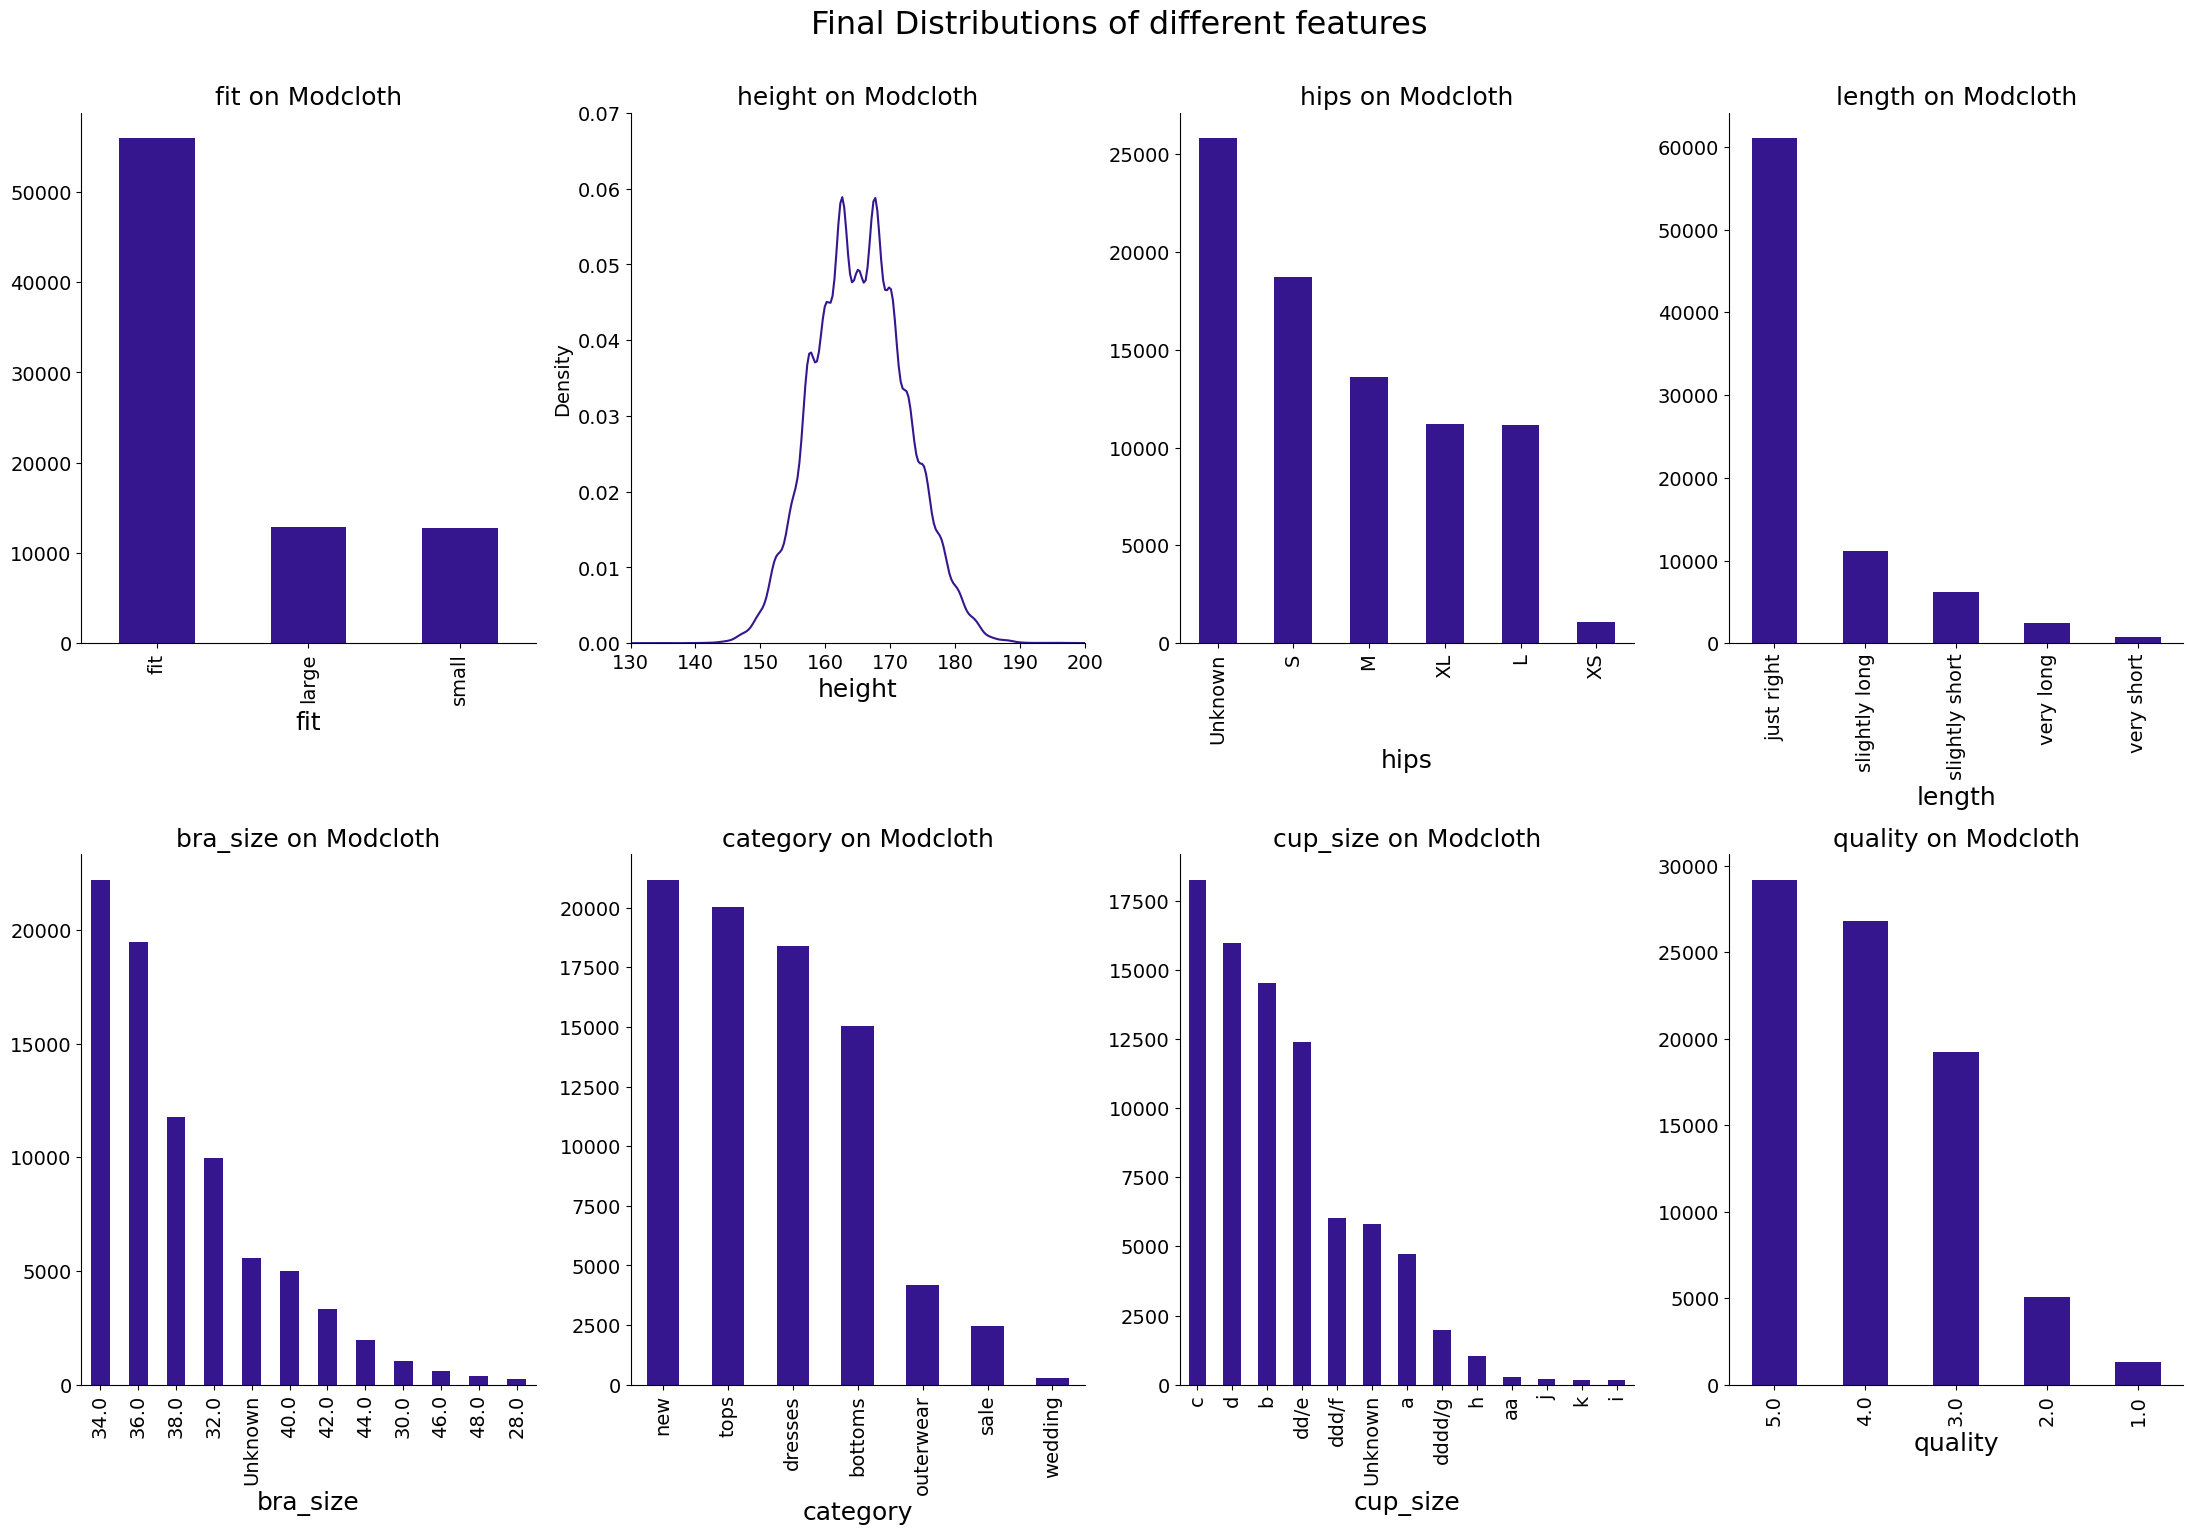

In [ ]:
# Mashiat_B190305046
def plot_dist(col, ax):
    if col != 'height':
        mc_df[col].value_counts().plot(kind='bar', facecolor='#35168e', ax=ax)
    else:
        mc_df[col].plot(kind='density', ax=ax, bw_method = 0.15, color='#35168e')
        ax.set_xlim(130,200)
        ax.set_ylim(0, 0.07)
    ax.set_xlabel('{}'.format(col), fontsize=18)
    ax.set_title("{} on Modcloth".format(col), fontsize= 18)
    return ax
f, ax = plt.subplots(2,4, figsize = (22,15))
f.tight_layout(h_pad=9, w_pad=2, rect=[0, 0.03, 1, 0.93])
cols = ['fit', 'height', 'hips', 'length','bra_size','category', 'cup_size',  'quality']
k = 0
for i in range(2):
    for j in range(4):
        plot_dist(cols[k], ax[i][j])
        k += 1
__ = plt.suptitle("Final Distributions of different features", fontsize= 23)

In [ ]:
# Mashiat_B190305046
def plot_barh(df,col, cmap = None, stacked=False, norm = None):
    df.plot(kind='barh', colormap=cmap, stacked=stacked)
    fig = plt.gcf()
    fig.set_size_inches(24,12)
    plt.title("Category vs {}-feedback -  Modcloth {}".format(col, '(Normalized)' if norm else ''), fontsize= 20)
    plt.ylabel('Category', fontsize = 18)
    plot = plt.xlabel('Frequency', fontsize=18)

def norm_counts(t):
    norms = np.linalg.norm(t.fillna(0), axis=1)
    t_norm = t[0:0]
    for row, euc in zip(t.iterrows(), norms):
        t_norm.loc[row[0]] = list(map(lambda x: x/euc, list(row[1])))
    return t_norm

In [ ]:
# Mashiat_B190305046
mc_df.category.value_counts()

,count
category,
new,21177
tops,20048
dresses,18402
bottoms,15047
outerwear,4180
sale,2469
wedding,271


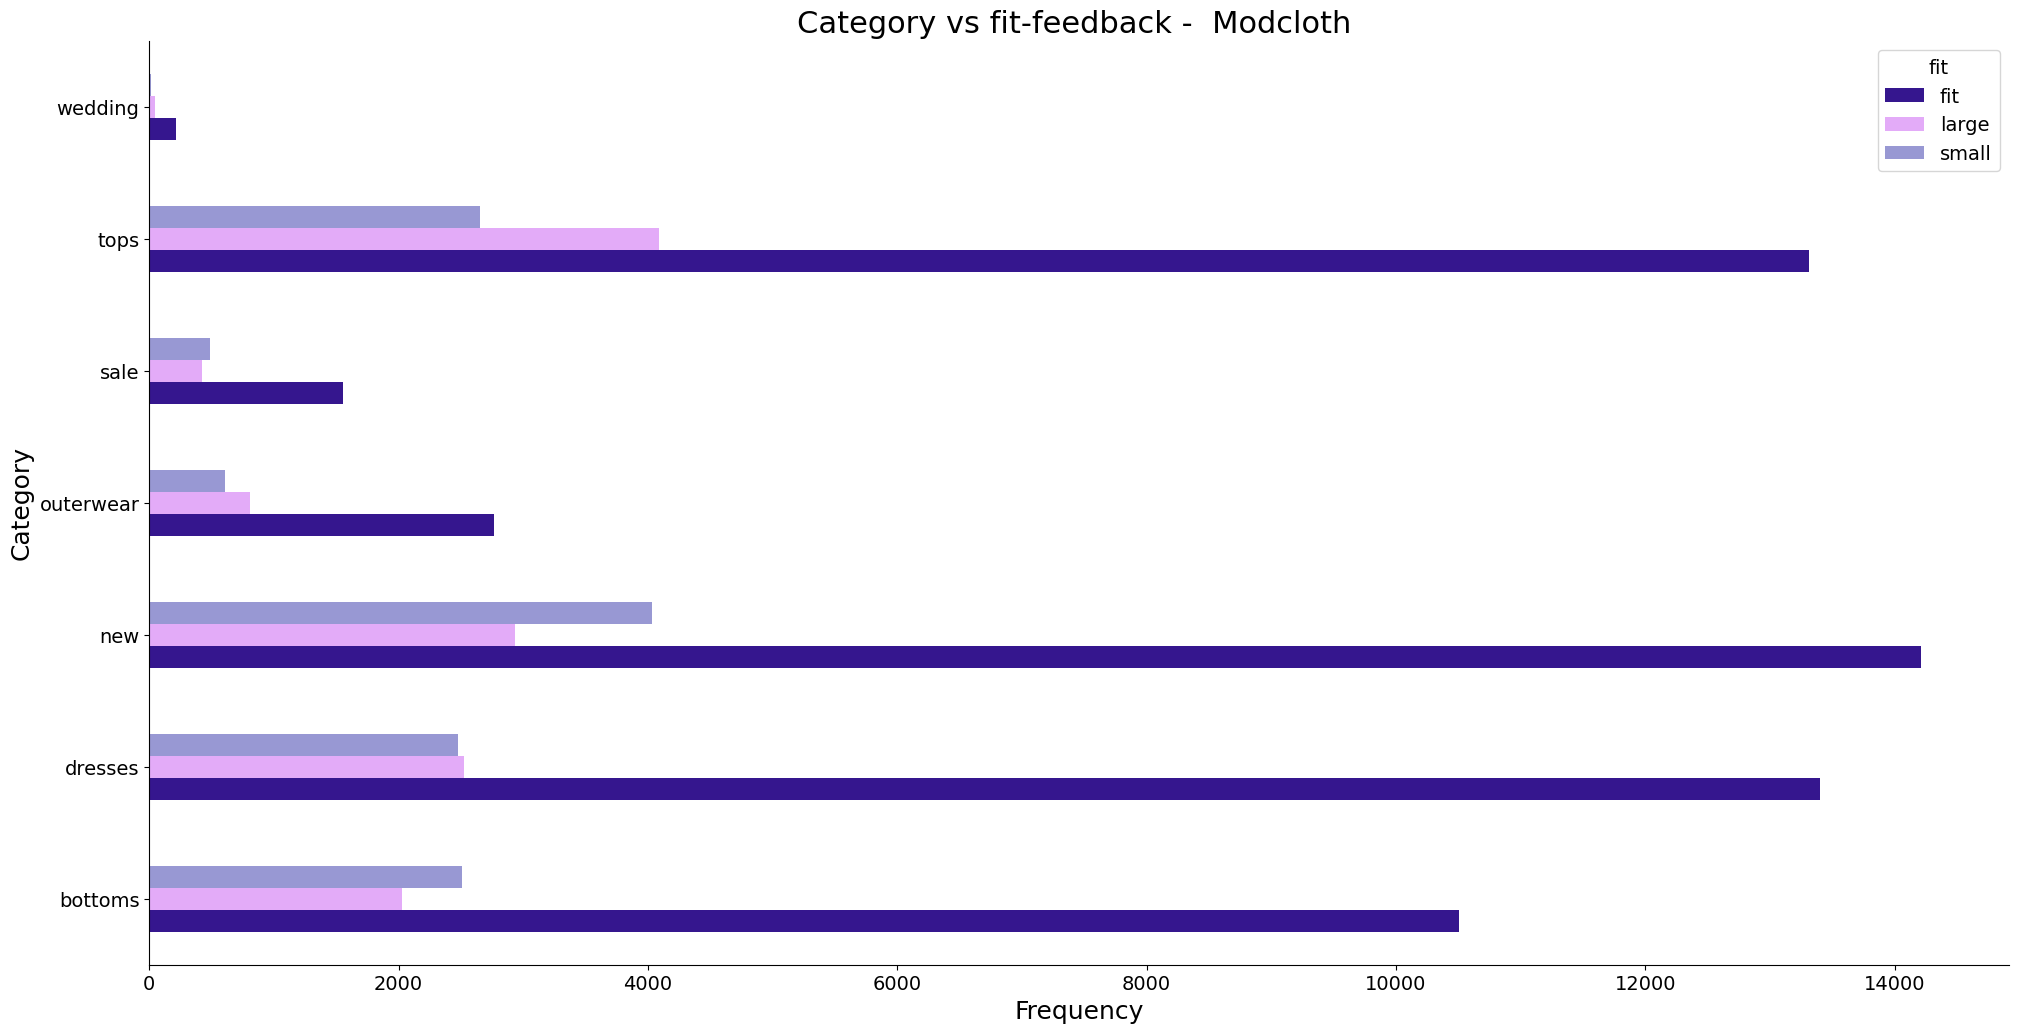

In [ ]:
# Mashiat_B190305046
def plot_barh(df,col, cmap = None, stacked=False, norm = None, color=None):
    df.plot(kind='barh', colormap=cmap, stacked=stacked, color=color)
    fig = plt.gcf()
    fig.set_size_inches(24,12)
    plt.title("Category vs {}-feedback -  Modcloth {}".format(col, '(Normalized)' if norm else ''), fontsize= 22)
    plt.ylabel('Category', fontsize = 18)
    plot = plt.xlabel('Frequency', fontsize=18)

g_by_category = mc_df.groupby('category')
cat_fit = g_by_category['fit'].value_counts()
cat_fit = cat_fit.unstack()
cat_fit_norm = norm_counts(cat_fit)
cat_fit_norm.drop(['fit'], axis=1, inplace=True)
plot_barh(cat_fit, 'fit',color=['#35168e','#e3abf8', '#9898d3', '#c39bd3'])

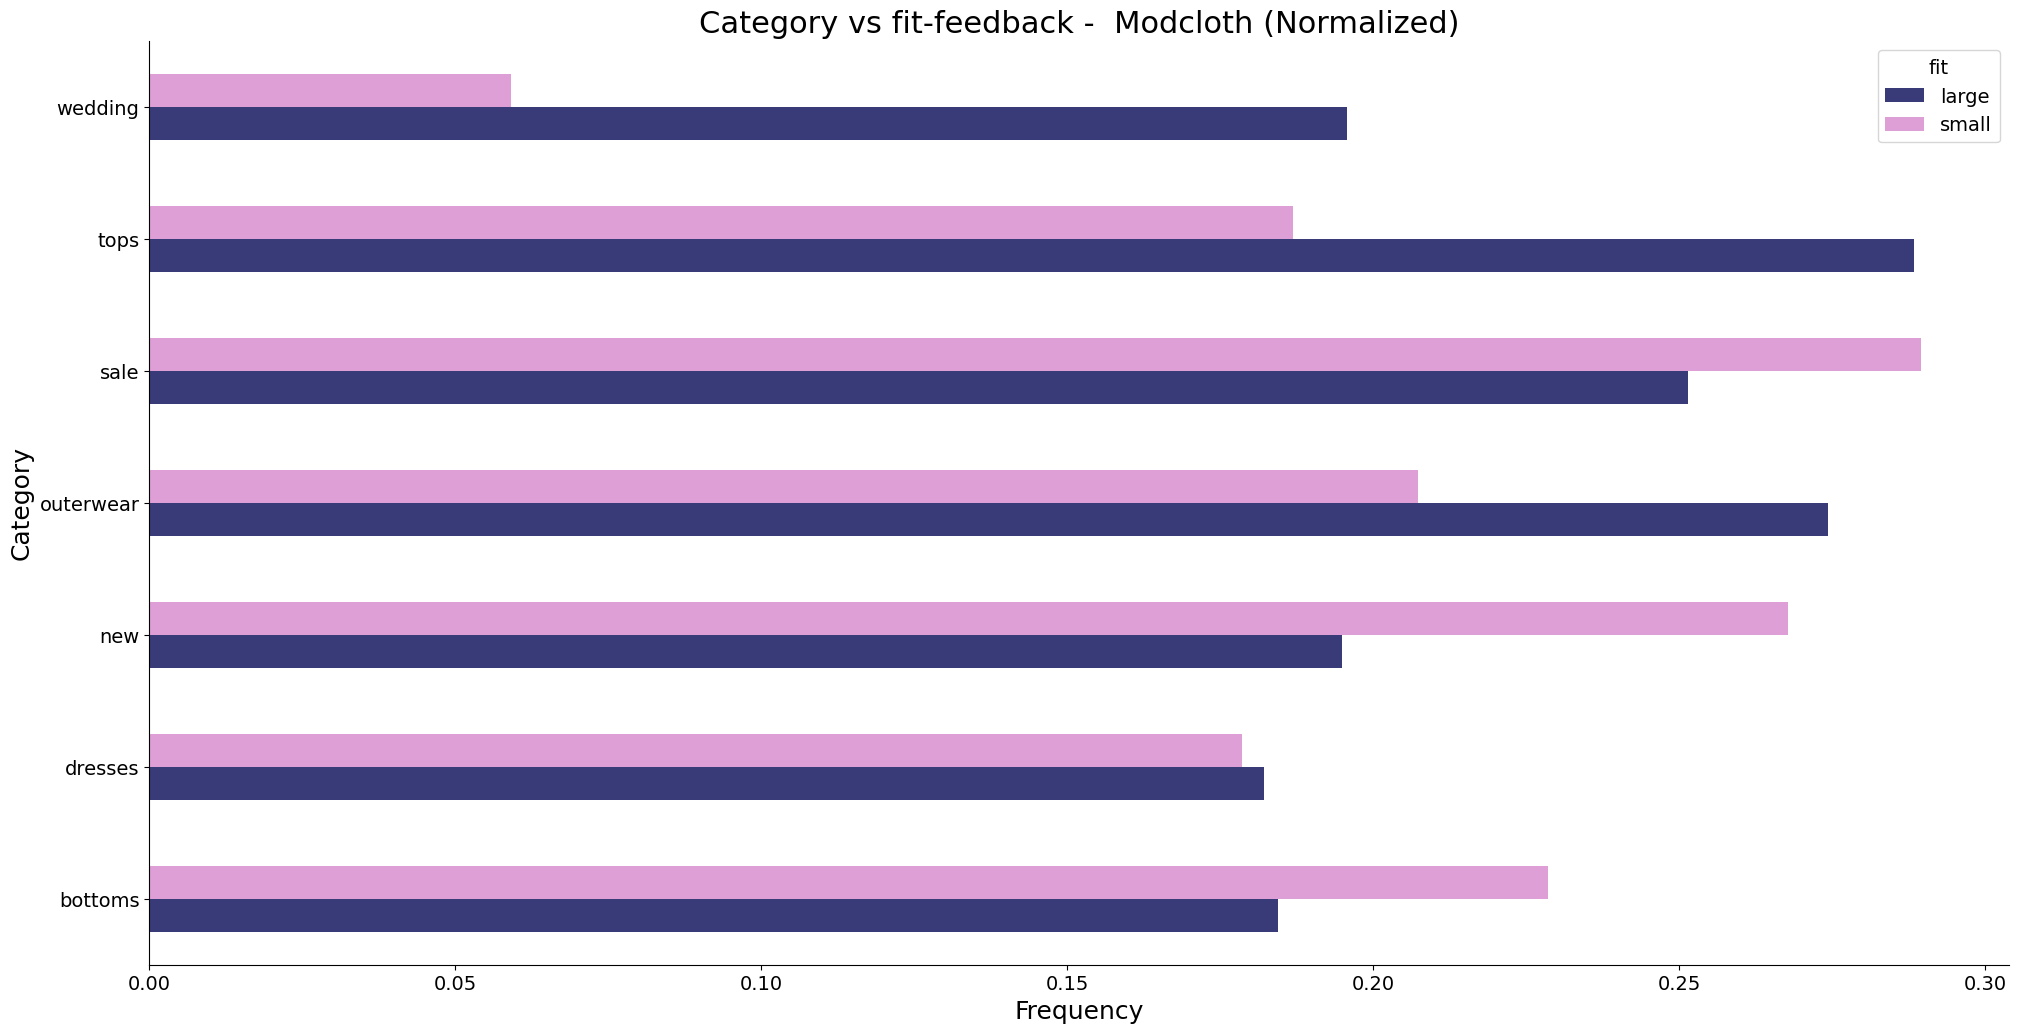

In [ ]:
# Mashiat_B190305046
plot_barh(cat_fit_norm, 'fit', norm=1, cmap='tab20b')

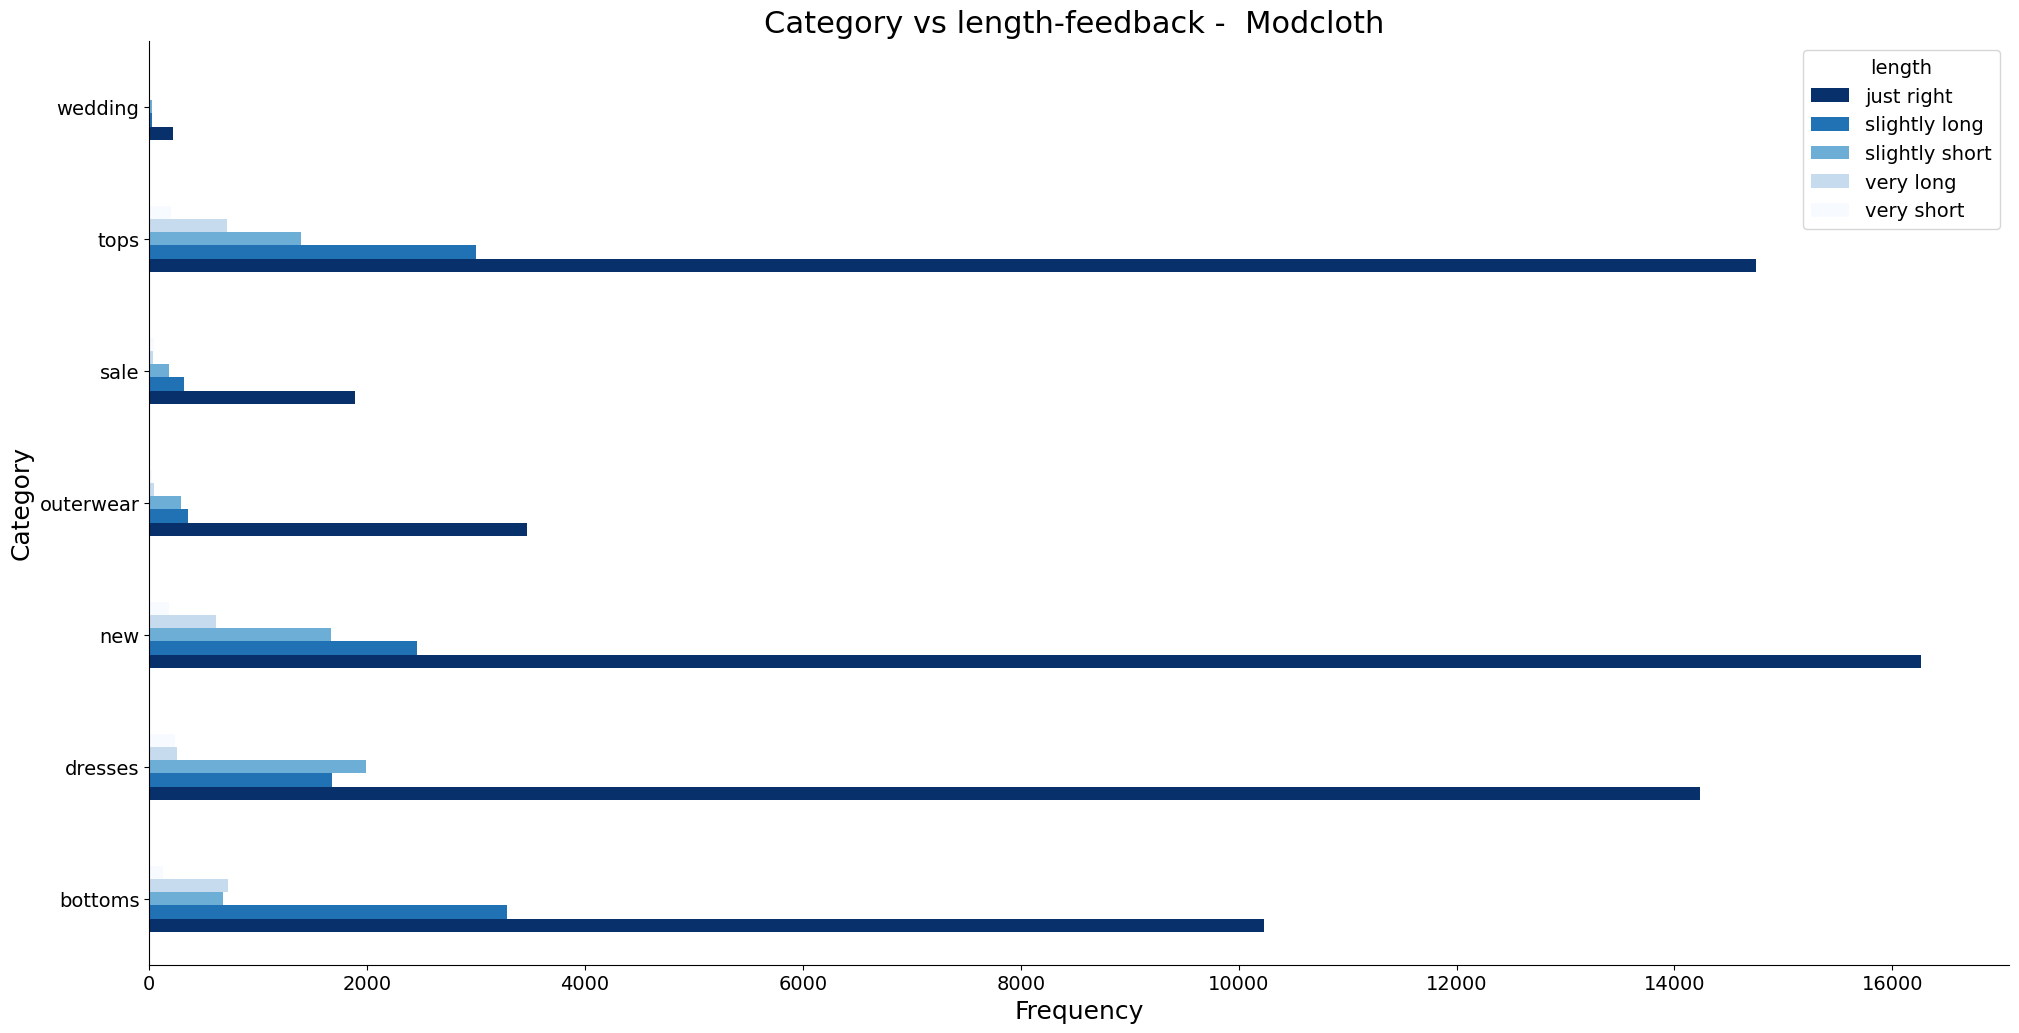

In [ ]:
# Mashiat_B190305046
cat_len = g_by_category['length'].value_counts()
cat_len = cat_len.unstack()
plot_barh(cat_len, 'length', 'Blues_r')

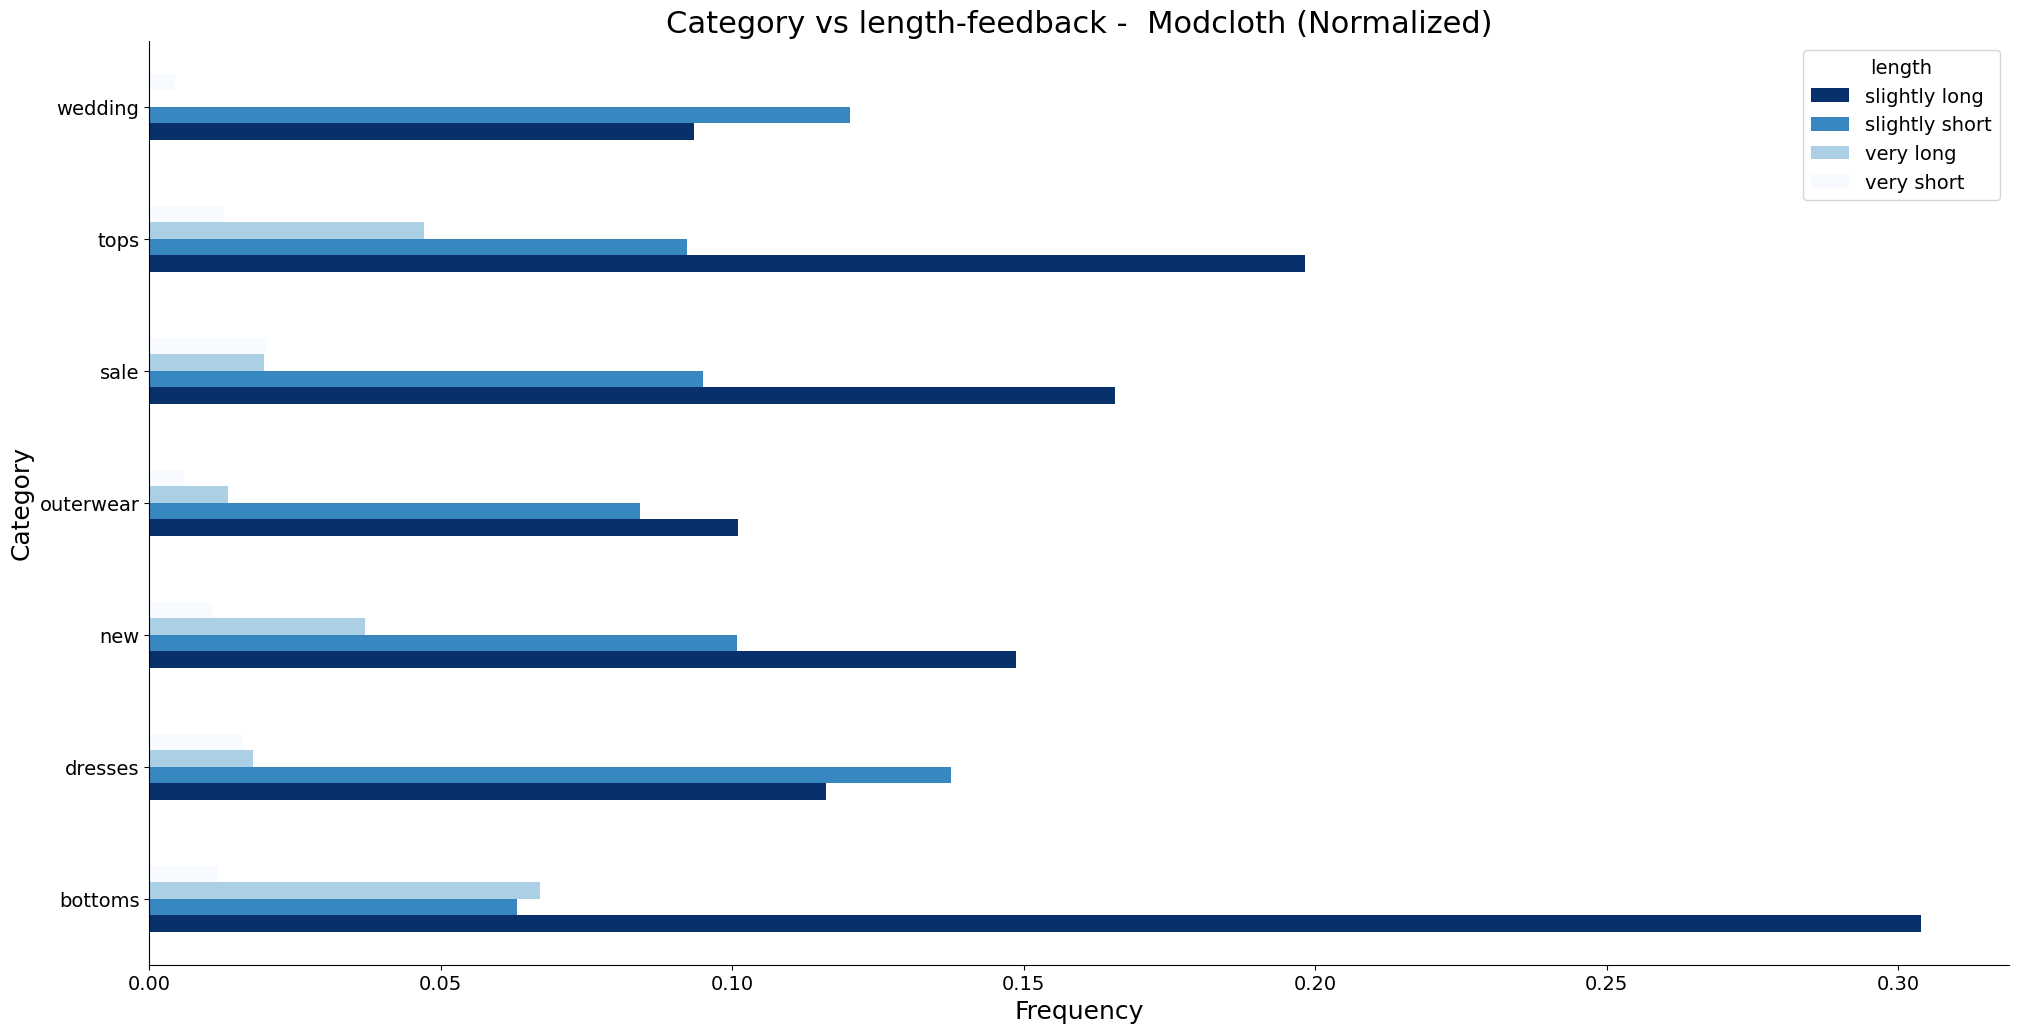

In [ ]:
# Mashiat_B190305046
cat_len_norm = norm_counts(cat_len)
cat_len_norm.drop(['just right'], axis = 1, inplace=True)
plot_barh(cat_len_norm, 'length', cmap='Blues_r', norm=1)

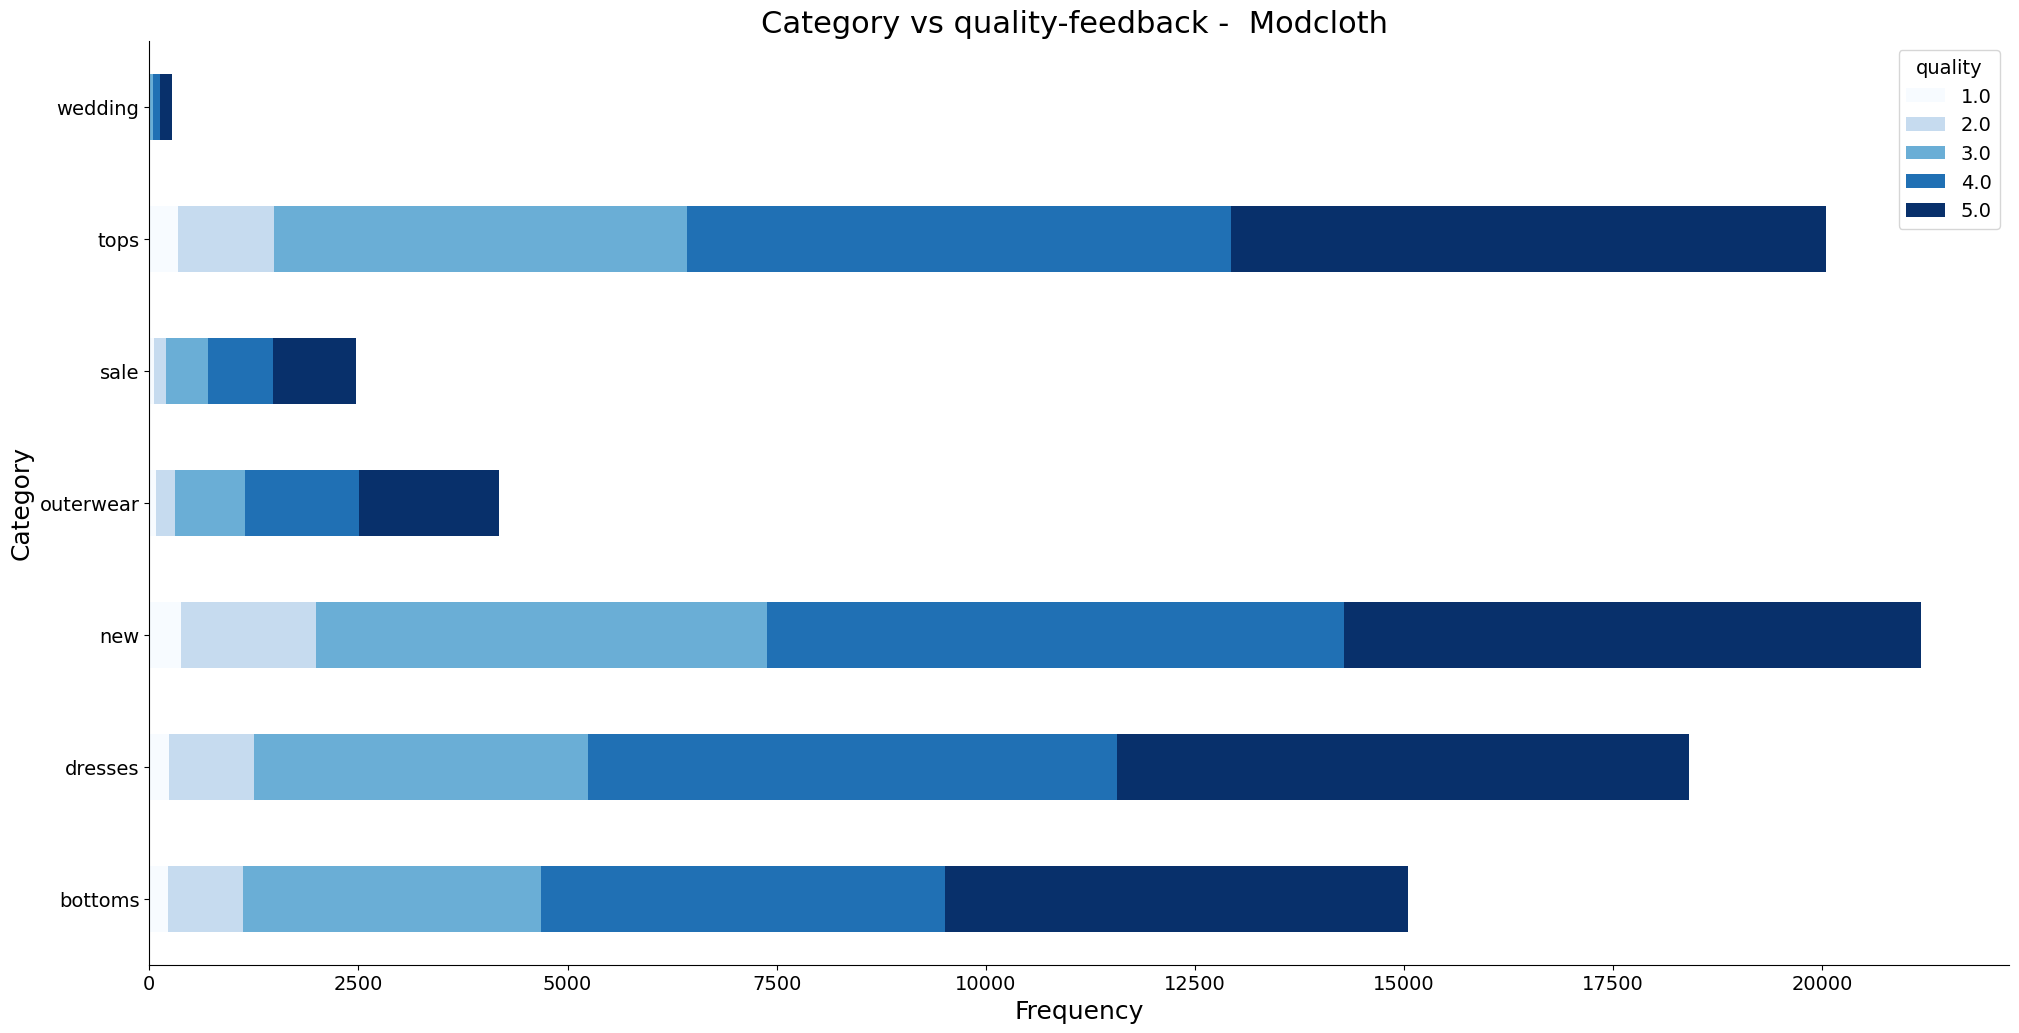

In [ ]:
# Mashiat_B190305046
cat_quality = g_by_category['quality'].value_counts()
cat_quality = cat_quality.unstack()
plot_barh(cat_quality, 'quality', 'Blues', stacked=1)

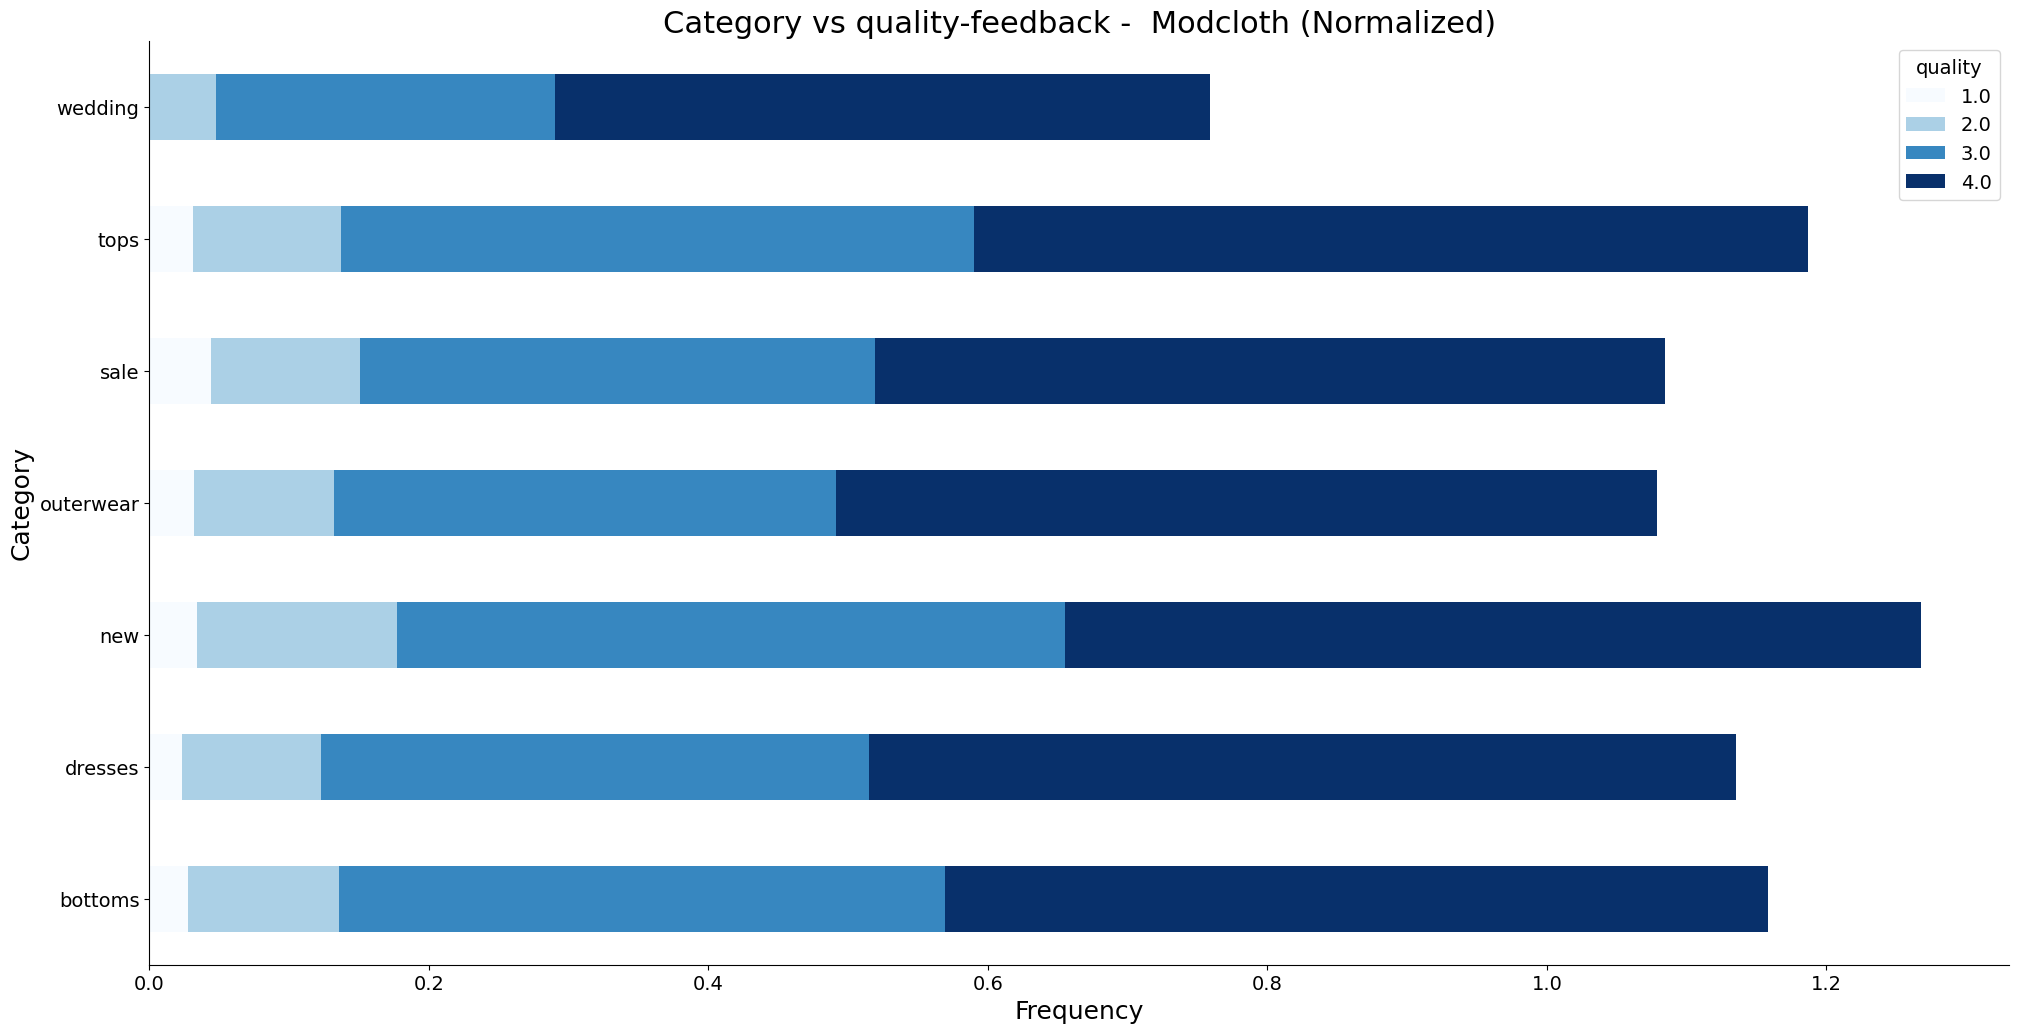

In [ ]:
# Mashiat_B190305046
cat_quality_norm = norm_counts(cat_quality)
cat_quality_norm.drop([5.0], axis = 1, inplace=True)
plot_barh(cat_quality_norm, 'quality', 'Blues', stacked=1, norm=1)

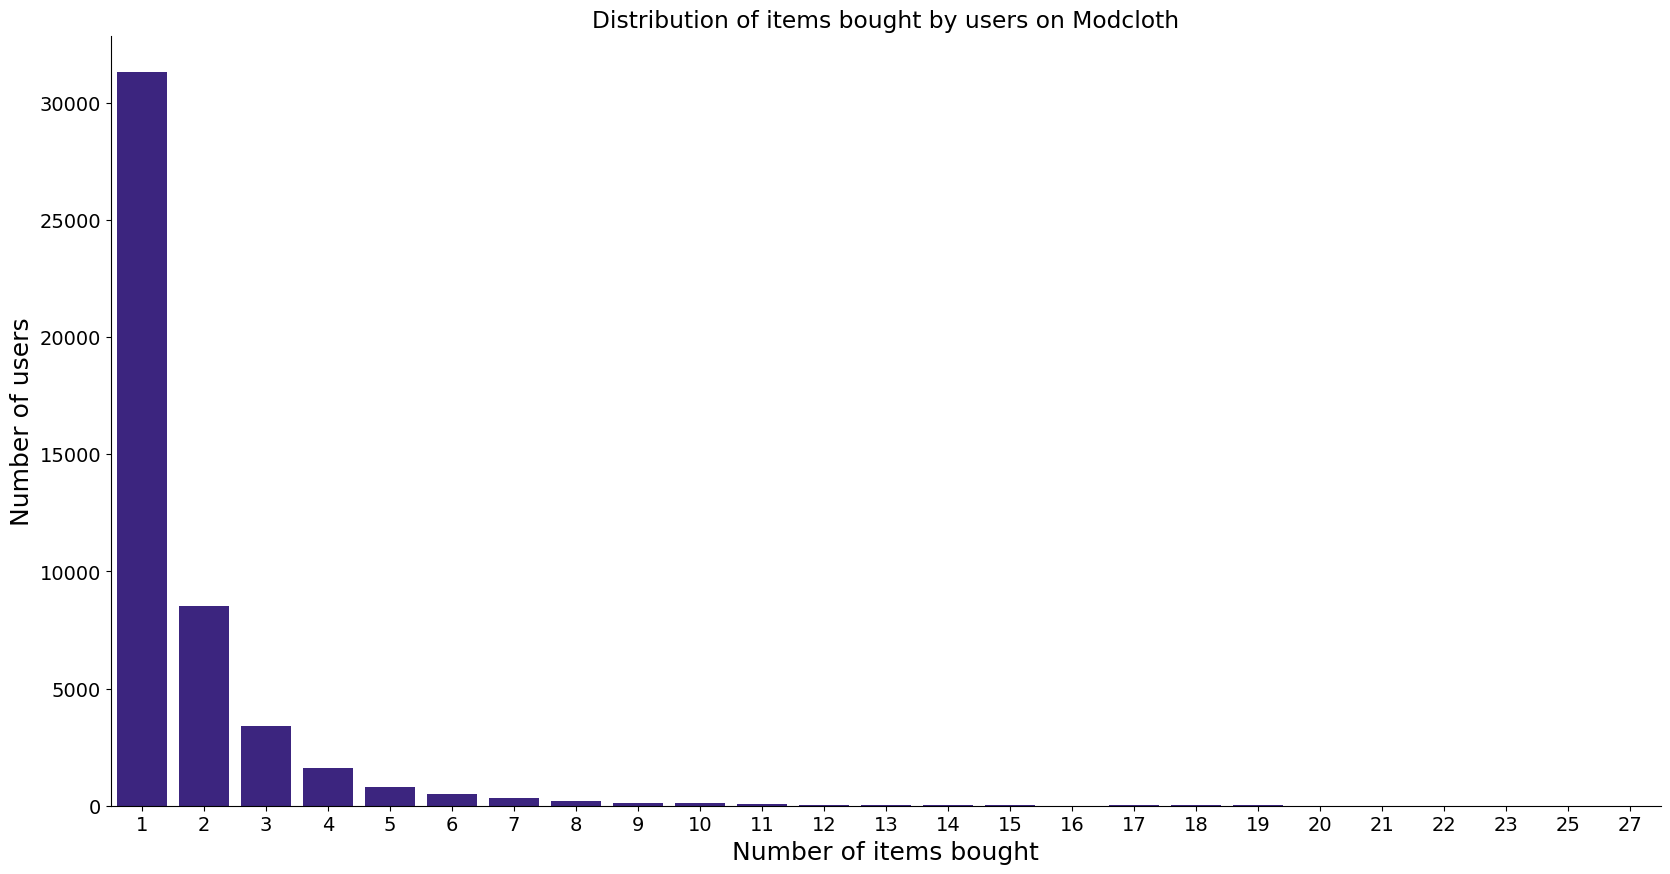

In [ ]:
# Mashiat_B190305046
items_bought = []
total_users = []
for i in range(min(mc_df.user_id.value_counts()),
               max(mc_df.user_id.value_counts())+1):
    all_users = sum(mc_df.user_id.value_counts() == i)
    if all_users != 0:
        total_users.append(all_users)
        items_bought.append(i)
plt.xlabel("Number of items bought", fontsize = 18)
plt.ylabel("Number of users", fontsize = 18)
plt.title("Distribution of items bought by users on Modcloth")
__ = sns.barplot(x=items_bought, y=total_users, color='#35168e')
fig = plt.gcf()
fig.set_size_inches(20,10)

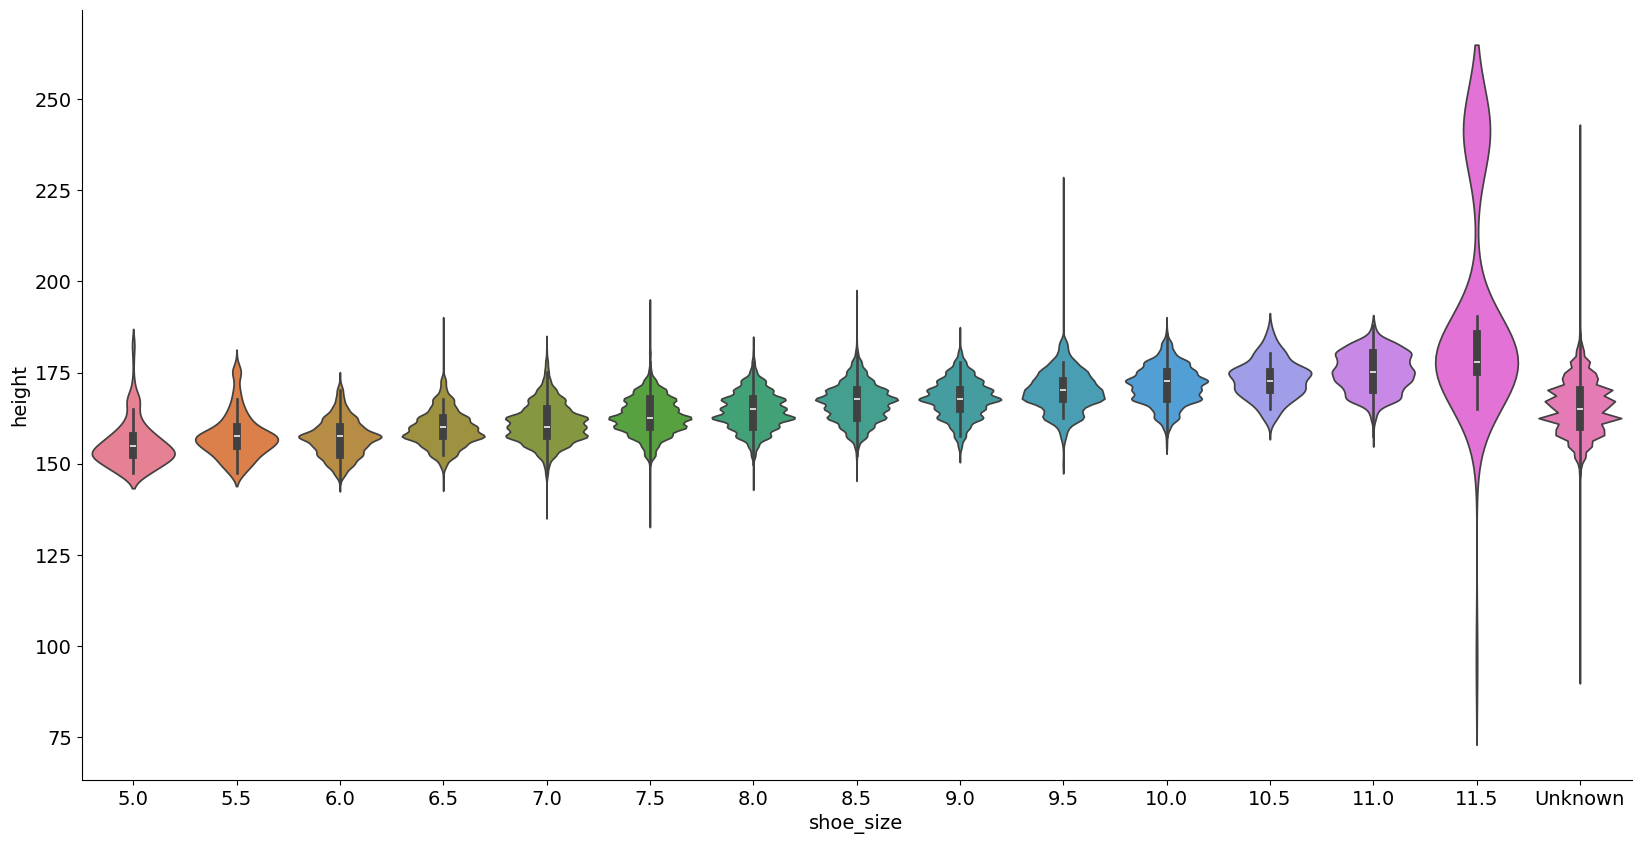

In [ ]:
# Mashiat_B190305046
fig = plt.gcf()
fig.set_size_inches(20,10)
palette = sns.color_palette("husl", n_colors=mc_df['shoe_size'].nunique())
__ = sns.violinplot(x='shoe_size', y='height', data=mc_df, palette=palette)
plt.show()